In [1]:
import time
import os
import numpy as np
import matplotlib.pyplot as plt
import qcodes as qc
import qcodes.instrument_drivers.nplab_drivers as npd

# Instrument initialization

In [2]:
npd.triton_init('lockin865', 'lockin830', 'srframe')
station = qc.Station(triton, lockin865, lockin830, srframe)

Connected to: OXFORD INSTRUMENTS Triton (serial:N/A, firmware:2.449) in 0.02s
Connected to: Stanford_Research_Systems SR865A (serial:003538, firmware:V1.51) in 4.24s
Connected to: Stanford_Research_Systems SR830 (serial:s/n49840, firmware:ver1.07) in 0.05s
Connected to: Stanford_Research_Systems SIM900 (serial:s/n152150, firmware:ver3.6) in 0.75s


# Fridge cooldown 1/24/2020

Pumping out fridge started Friday evening at ~5:00 pm. Fridge cooldown started in the morning when pressure reading on the pump was 1.7e-3 torr. Pressure in the fridge OVC is supposedly at ~1.45e-2 torr. Cooled down to 1.5K by Sunday evening at 11pm (likely just an hour more till base temperature). Then we had to warm it up since we forgot to put the shield that goes between the magnet and the sample puck.

In [56]:
triton.read_temps()

MC - on:  107.773 K
MC_cernox - on:  289.705 K
still - on:  238.264 K
cold_plate - on:  238.264 K
magnet - off:  293.418 K
PT2h - on:  293.672 K
PT2p - on:  293.5 K
PT1h - on:  295.306 K
PT1p - on:  295.177 K


In [45]:
triton.read_pressures()

P1:  745.32
P2:  393.708
P3:  6.7
P4:  6.9
P5:  41.8247
POVC:  0.00055


In [46]:
triton.read_pumps()

Turbo: 0,  speed: 0.0 Hz
KNF: 0
Forepump: 0


In [47]:
triton.read_valves()

V1:  CLOSE
V2:  CLOSE
V3:  CLOSE
V4:  CLOSE
V5:  CLOSE
V6:  CLOSE
V7:  CLOSE
V8:  CLOSE
V9:  CLOSE


In [37]:
triton.status()

'OK'

# Cooldown number 2: 1/29/2020

Starting at 2.65e-2 mbar OVC pressure, at 5:30 pm, after pumping down ~5 hours.

In [116]:
triton.read_temps()

MC - on:  0.0276132 K
MC_cernox - off:  1.21336 K
still - on:  0.750453 K
cold_plate - on:  0.0675289 K
magnet - on:  3.80336 K
PT2h - on:  3.17958 K
PT2p - on:  3.39363 K
PT1h - on:  47.2864 K
PT1p - on:  57.3238 K


In [117]:
triton.read_pressures()

P1:  2.54852
P2:  367.766
P3:  0.056
P4:  1.3
P5:  76.2237
POVC:  0.0003


# M26, W3, and W5 setup and initial measurements

## Setup

**Instrument setup**

Just a 100 M$\Omega$ resistor that limits the current. Excitation supplied by the lockin865, fed into the srframe summing amplifier. srframe.volt_p1 controls the gate (1 G$\Omega$ limiting resistor), and srframe.volt_p5 controls the DC offset going into the summing amplifier

**M26: two hallbars with 8 contacts, both on the same gate. Single-sided WSe2, aligned hBN**

Gate 12 (PPMS->fridge 14->12)

Device 1: 25-30, 2, 13 (13 doesn't work)<br>
PPMS->Fridge contacts: x->25, 7->26, 6->27, 5->28, 4->29, 3->30, x->13, x->2 (x means not connected on the PPMS)<br>
Source/drain are 30, 26

Device 2: 3-10 (looks like 3, 4 are shorted somehow)<br>
PPMS->Fridge contacts: x->3, x->4, 8->5, 9->6, 10->7, 11(not good contact)->8, 12->9, 13->10<br>
Source/drain are 9, 5

**W3: double sided WSe2, 12-contact hallbar**

Gate 22 (PPMS->Fridge 9->22)

Lines used: 14, 16, 17, 19-21, (14-21 all seem bad, except perhaps 14 is useable) 23, 24, 44-48 (47 requires 45 to be floating)

It looks like we should use 23, 44 as source/drain, though perhaps 14 will work instead of 44.

PPMS->Fridge contacts: 4->14, x->16, 5->17, 6->19, 7->20, 8->21, 10->23, 11->24, 12->48, 13->47, 14->46, 3->44

**W5: same setup as W3, same basic design**

Gate 36 (PPMS->Fridge 6->36)

Lines used: 31-35, 37-42 (one contact not bonded because N-grease got on the pad)

PPMS->Fridge contacts: 12->31, 11->32, 10->33, 9->34, 8->x, 7->35, 5->37, 4->38, 3->39, 14->40, x->41, 13->42

31-34 seem like bad contacts (and 8 on the PPMS too). High resistance. Perhaps 32 is good. 34 is perhaps marginally good, but measurements taken with it show large fluctuations. 42 also has high resistance, though it may work.

It seems best to use 41, 35 as source/drain.

## Initial measurements

In [38]:
srframe.volt_p1.step = 0.08
srframe.volt_p1.inter_delay = 0.1
srframe.volt_p5.step = 0.08
srframe.volt_p5.inter_delay = 0.1

In [119]:
# M26 test

In [120]:
srframe.volt_p1(-15)
time.sleep(10)
gvals = np.linspace(-15, 15, 301)
data1, plot1 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='M26_basetemp_1nA_28-27_865')
srframe.volt_p1(0)

Started at 2020-02-01 14:13:17
DataSet:
   location = 'data/2020-02-01/#001_M26_basetemp_1nA_28-27_865_14-13-07'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2020-02-01 14:20:08


In [18]:
%matplotlib notebook

<IPython.core.display.Javascript object>


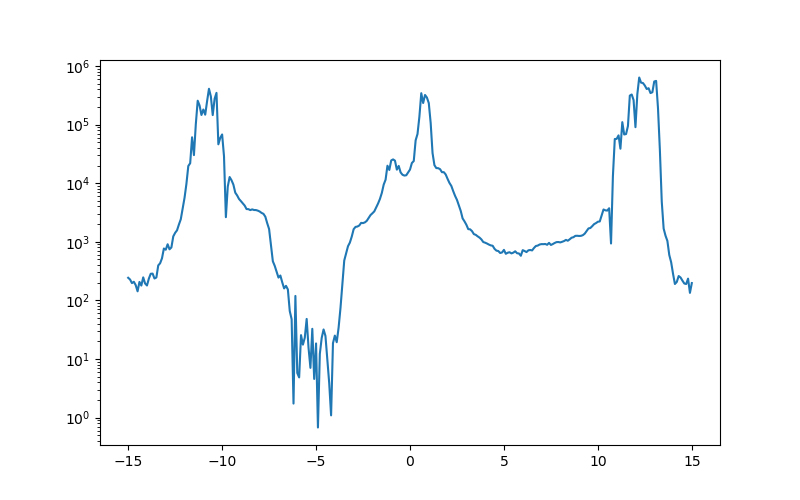

In [122]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data1.lockin865_X[:]/1e-9), label='M26 28-27')

In [123]:
srframe.volt_p1(-15)
time.sleep(10)
gvals = np.linspace(-15, 15, 301)
data2, plot2 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='M26_basetemp_1nA_28-27_865_repeat')
srframe.volt_p1(0)

Started at 2020-02-01 14:23:11
DataSet:
   location = 'data/2020-02-01/#002_M26_basetemp_1nA_28-27_865_repeat_14-23-10'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2020-02-01 14:30:03


<IPython.core.display.Javascript object>


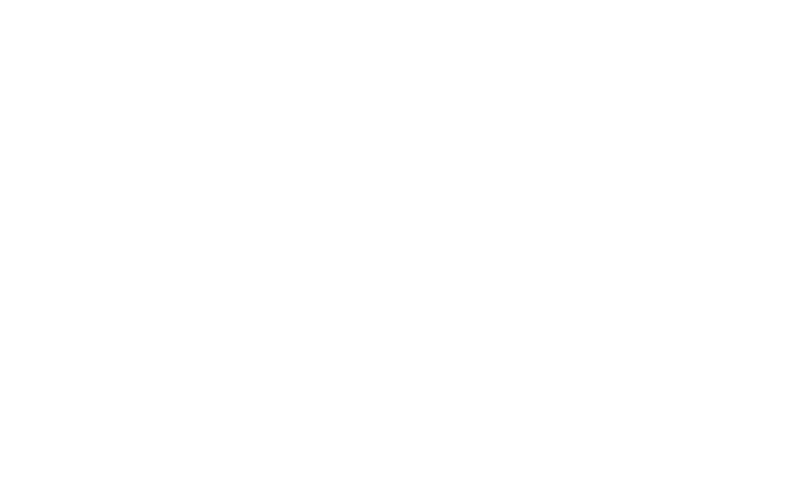

In [125]:
plt.figure(figsize=(8, 5))
#plt.semilogy(gvals, np.abs(data1.lockin865_X[:]/1e-9), label='M26 28-27 source 26')
plt.semilogy(gvals, np.abs(data2.lockin865_X[:]/1e-9), label='M26 28-27 source 29')

In [126]:
bvals = np.linspace(0, 4, 41)
gvals = np.linspace(-12, 13, 401)
data3, plot3 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=10, SetDelay2=1.1, Param2_SetBetween=0, DataName='M26_865_28-27_830_25-27_2nA_0to4T')

Started at 2020-02-01 15:18:46
Are you sure you want to use the magnet? [y/n]: y
Please wait 10.594 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.994 seconds f

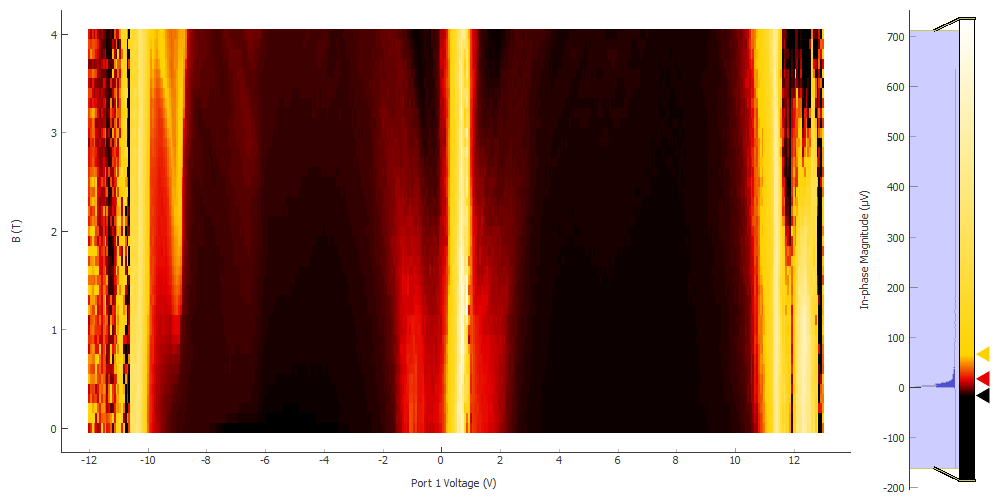

In [348]:
plot3[0]

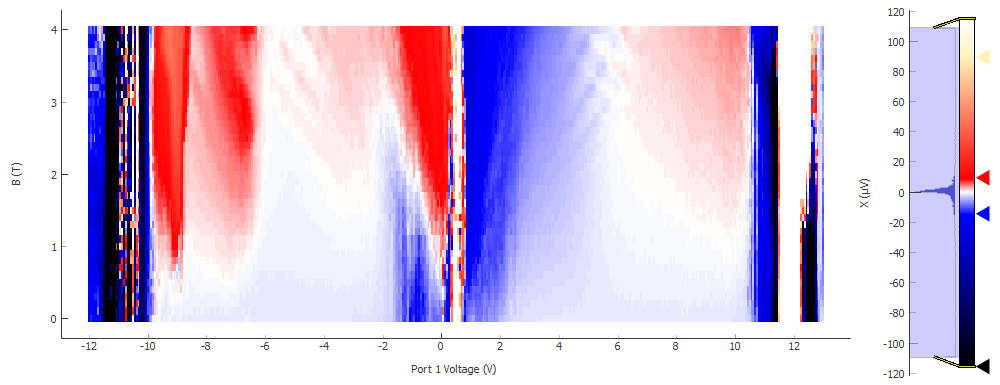

In [349]:
plot3[2]

In [127]:
bvals = np.linspace(4.1, 6, 20)
gvals = np.linspace(-12, 13, 401)
data4, plot4 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=10, SetDelay2=1.1, Param2_SetBetween=0, DataName='M26_865_28-27_830_25-27_2nA_4p1to6T')

Started at 2020-02-02 06:21:57
Please wait 69.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.994 seconds for the field sweep, plus the time required for opera

In [128]:
lockin865.amplitude(0)

In [129]:
#now go to W5

In [130]:
srframe.volt_p1(-8)
time.sleep(10)
gvals = np.linspace(-8, 8, 321)
data5, plot5 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='W5_basetemp_1nA_I41-35_V37-38_865')
srframe.volt_p1(0)

Started at 2020-02-03 10:55:48
DataSet:
   location = 'data/2020-02-03/#001_W5_basetemp_1nA_I41-35_V37-38_865_10-55-48'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (321,)
   Measured | lockin865_X         | X            | (321,)
   Measured | lockin865_Y         | Y            | (321,)
Finished at 2020-02-03 11:02:17


In [131]:
srframe.volt_p1(8)
time.sleep(10)
gvals = np.linspace(8, -8, 321)
data6, plot6 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='W5_basetemp_1nA_I41-35_V39-38_865')
srframe.volt_p1(0)

Started at 2020-02-03 11:05:15
DataSet:
   location = 'data/2020-02-03/#002_W5_basetemp_1nA_I41-35_V39-38_865_11-05-14'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (321,)
   Measured | lockin865_X         | X            | (321,)
   Measured | lockin865_Y         | Y            | (321,)
Finished at 2020-02-03 11:11:44


In [132]:
srframe.volt_p1(8)
time.sleep(10)
gvals = np.linspace(8, -8, 321)
data7, plot7 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='W5_basetemp_1nA_I41-35_V40-39_865')
srframe.volt_p1(0)

Started at 2020-02-03 11:14:56
DataSet:
   location = 'data/2020-02-03/#003_W5_basetemp_1nA_I41-35_V40-39_865_11-14-55'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (321,)
   Measured | lockin865_X         | X            | (321,)
   Measured | lockin865_Y         | Y            | (321,)
Finished at 2020-02-03 11:21:25


<IPython.core.display.Javascript object>


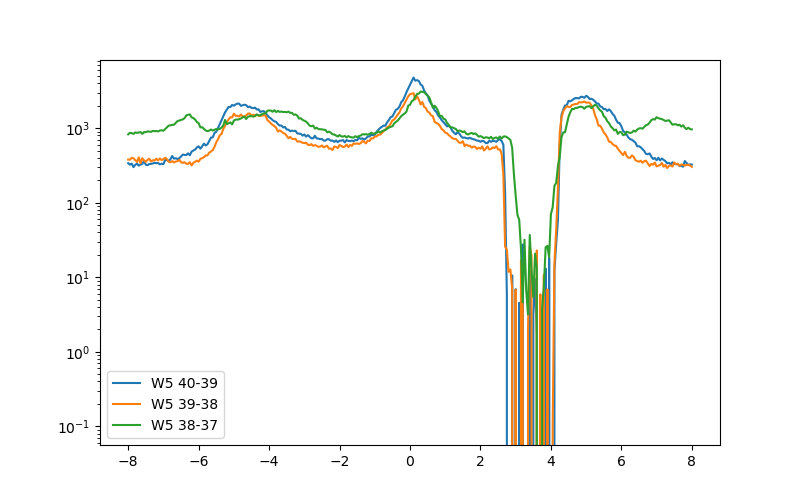

In [139]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, data7.lockin865_X[:]/1e-9, label='W5 40-39')
plt.semilogy(gvals, data6.lockin865_X[:]/1e-9, label='W5 39-38')
plt.semilogy(-gvals, data5.lockin865_X[:]/1e-9, label='W5 38-37')
plt.legend()

In [140]:
srframe.volt_p1(-15)
time.sleep(10)
gvals = np.linspace(-15, 15, 301)
data8, plot8 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='M26_basetemp_1nA_29-28_865_source30')
srframe.volt_p1(0)

Started at 2020-02-03 12:38:40
DataSet:
   location = 'data/2020-02-03/#004_M26_basetemp_1nA_29-28_865_source30_12-38-39'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2020-02-03 12:45:44


<IPython.core.display.Javascript object>


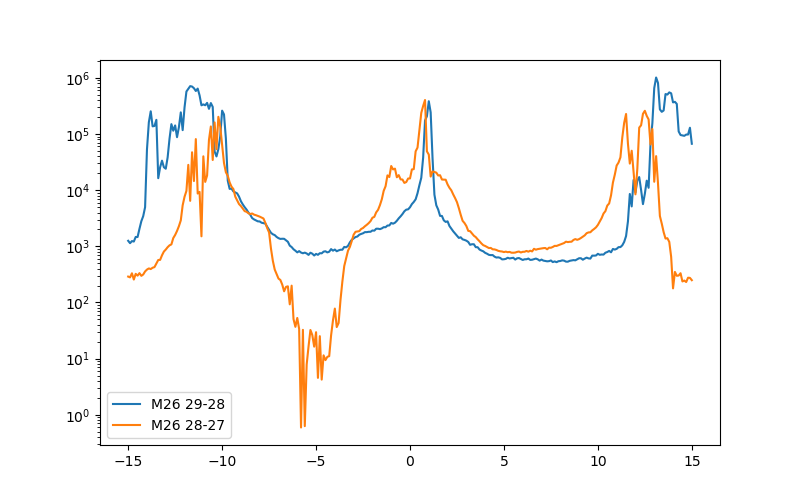

In [141]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data8.lockin865_X[:]/1e-9), label='M26 29-28')
plt.semilogy(gvals, np.abs(data2.lockin865_X[:]/1e-9), label='M26 28-27')
plt.legend()

In [143]:
srframe.volt_p1(-15)
time.sleep(10)
gvals = np.linspace(-15, 15, 301)
data9, plot9 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M26_basetemp_0.5nA_29-28_865_28-2_830_source30')
srframe.volt_p1(0)

Started at 2020-02-03 12:53:43
DataSet:
   location = 'data/2020-02-03/#005_M26_basetemp_0.5nA_29-28_865_28-2_830_source30_12-53-41'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
   Measured | lockin830_X         | X            | (301,)
   Measured | lockin830_Y         | Y            | (301,)
Finished at 2020-02-03 13:00:56


In [144]:
triton.field(-0.5)

Sweep time approximately 159.70000000000002 seconds


In [147]:
triton.field(0)

Sweep time approximately 160.0 seconds


In [146]:
srframe.volt_p1(-15)
time.sleep(10)
gvals = np.linspace(-15, 15, 301)
data10, plot10 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M26_basetemp_0.5nA_29-28_865_28-2_830_source30_after-0.5T')
srframe.volt_p1(0)

Started at 2020-02-03 13:02:16
DataSet:
   location = 'data/2020-02-03/#006_M26_basetemp_0.5nA_29-28_865_28-2_830_source30_after-0.5T_13-02-15'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
   Measured | lockin830_X         | X            | (301,)
   Measured | lockin830_Y         | Y            | (301,)
Finished at 2020-02-03 13:09:30


In [148]:
srframe.volt_p1(-15)
time.sleep(10)
gvals = np.linspace(-15, 15, 301)
data11, plot11 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M26_basetemp_0.5nA_29-28_865_28-2_830_source30_after-0.5T')
srframe.volt_p1(0)

Started at 2020-02-03 13:15:20
DataSet:
   location = 'data/2020-02-03/#007_M26_basetemp_0.5nA_29-28_865_28-2_830_source30_after-0.5T_13-15-18'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
   Measured | lockin830_X         | X            | (301,)
   Measured | lockin830_Y         | Y            | (301,)
Finished at 2020-02-03 13:22:34


<IPython.core.display.Javascript object>


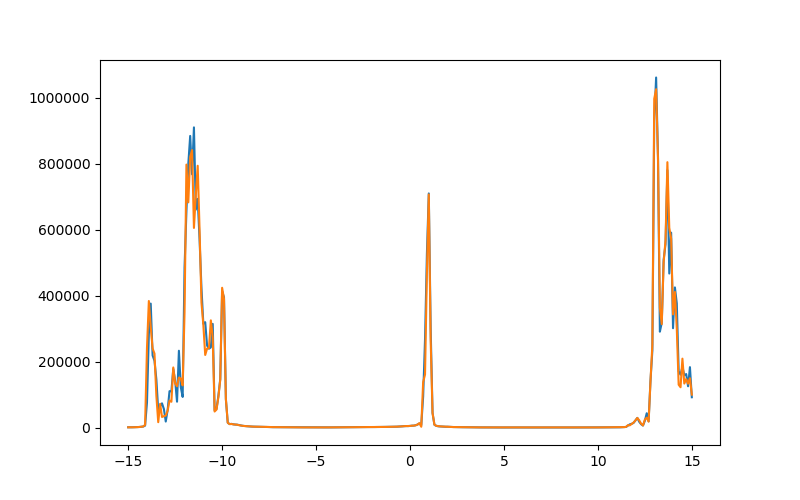

In [158]:
plt.figure(figsize=(8, 5))
plt.plot(gvals, (data9.lockin865_X[:]/0.5e-9), label='M26 before')
plt.plot(gvals, (data11.lockin865_X[:]/0.5e-9), label='M26 after')
#plt.legend()

In [159]:
triton.field()

0.389215

In [160]:
srframe.volt_p1(-15)
time.sleep(10)
gvals = np.linspace(-15, 15, 301)
data12, plot12 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M26_basetemp_0.5nA_29-28_865_28-2_830_source30_after+0.5T')
srframe.volt_p1(0)

Started at 2020-02-03 13:52:14
DataSet:
   location = 'data/2020-02-03/#008_M26_basetemp_0.5nA_29-28_865_28-2_830_source30_after+0.5T_13-52-13'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
   Measured | lockin830_X         | X            | (301,)
   Measured | lockin830_Y         | Y            | (301,)
Finished at 2020-02-03 13:59:28


<IPython.core.display.Javascript object>


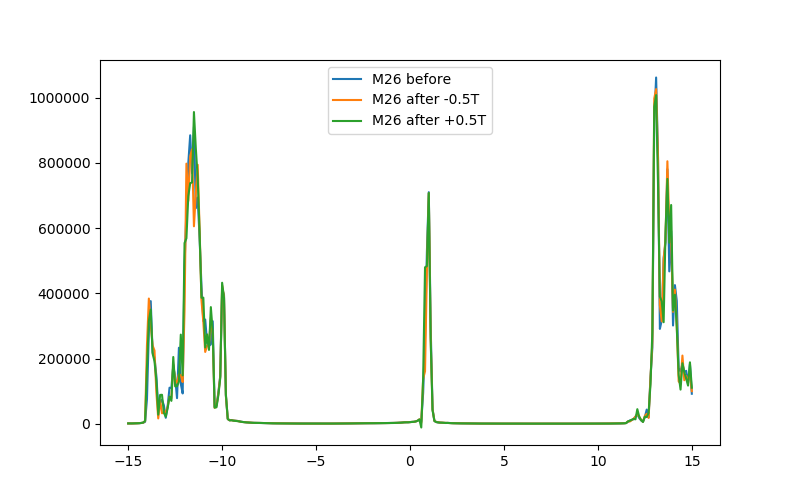

In [162]:
plt.figure(figsize=(8, 5))
plt.plot(gvals, (data9.lockin865_X[:]/0.5e-9), label='M26 before')
plt.plot(gvals, (data11.lockin865_X[:]/0.5e-9), label='M26 after -0.5T')
plt.plot(gvals, (data12.lockin865_X[:]/0.5e-9), label='M26 after +0.5T')
plt.legend()

In [163]:
srframe.volt_p1(-15)
time.sleep(10)
gvals = np.linspace(-15, 15, 301)
data13, plot13 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='M26_basetemp_0.5nA_28-27_865_source30_after+0.5T')
srframe.volt_p1(0)

Started at 2020-02-03 14:54:31
DataSet:
   location = 'data/2020-02-03/#009_M26_basetemp_0.5nA_28-27_865_source30_after+0.5T_14-54-30'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2020-02-03 15:01:22


In [164]:
srframe.volt_p1(-15)
time.sleep(10)
gvals = np.linspace(-15, 15, 301)
data14, plot14 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='M26_basetemp_0.5nA_28-27_865_source30_after+0.5T_repeat')
srframe.volt_p1(0)

Started at 2020-02-03 15:02:31
DataSet:
   location = 'data/2020-02-03/#010_M26_basetemp_0.5nA_28-27_865_source30_after+0.5T_repeat_15-02-30'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2020-02-03 15:09:23


In [165]:
triton.field(-0.5)

Sweep time approximately 160.006 seconds


<IPython.core.display.Javascript object>


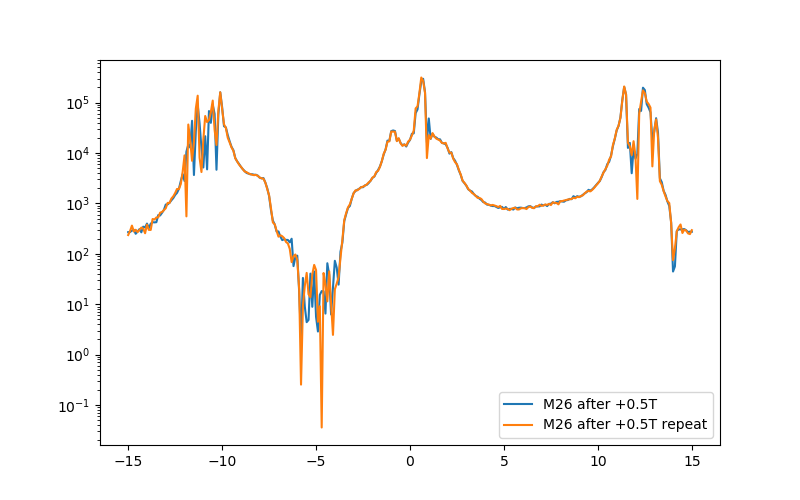

In [167]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data13.lockin865_X[:]/0.5e-9), label='M26 after +0.5T')
plt.semilogy(gvals, np.abs(data14.lockin865_X[:]/0.5e-9), label='M26 after +0.5T repeat')
plt.legend()

In [169]:
srframe.volt_p1(-15)
time.sleep(10)
gvals = np.linspace(-15, 15, 301)
data15, plot15 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='M26_basetemp_0.5nA_28-27_865_source30_after-0.7T')
srframe.volt_p1(0)

Started at 2020-02-03 15:18:09
DataSet:
   location = 'data/2020-02-03/#012_M26_basetemp_0.5nA_28-27_865_source30_after-0.7T_15-18-09'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2020-02-03 15:25:01


<IPython.core.display.Javascript object>


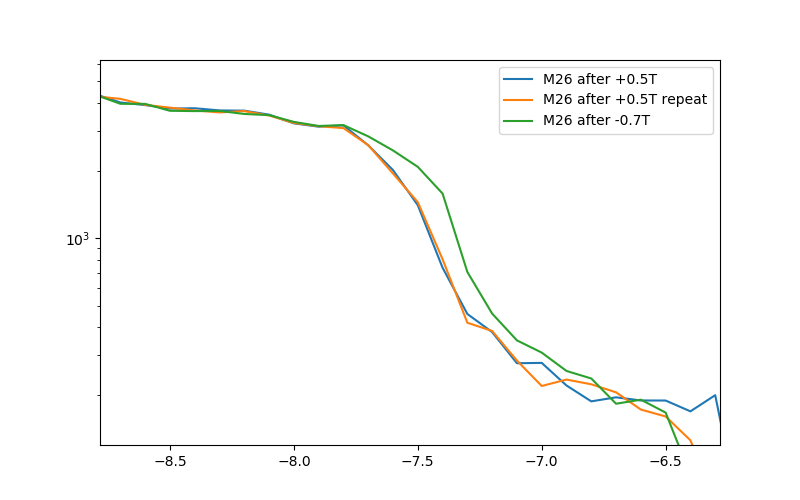

In [170]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data13.lockin865_X[:]/0.5e-9), label='M26 after +0.5T')
plt.semilogy(gvals, np.abs(data14.lockin865_X[:]/0.5e-9), label='M26 after +0.5T repeat')
plt.semilogy(gvals, np.abs(data15.lockin865_X[:]/0.5e-9), label='M26 after -0.7T')
plt.legend()

In [171]:
srframe.volt_p1(-15)
time.sleep(10)
gvals = np.linspace(-15, 15, 301)
data16, plot16 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='M26_basetemp_0.5nA_28-27_865_source30_after-0.7T_repeat')
srframe.volt_p1(0)

Started at 2020-02-03 15:27:57
DataSet:
   location = 'data/2020-02-03/#013_M26_basetemp_0.5nA_28-27_865_source30_after-0.7T_repeat_15-27-56'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2020-02-03 15:34:48


<IPython.core.display.Javascript object>


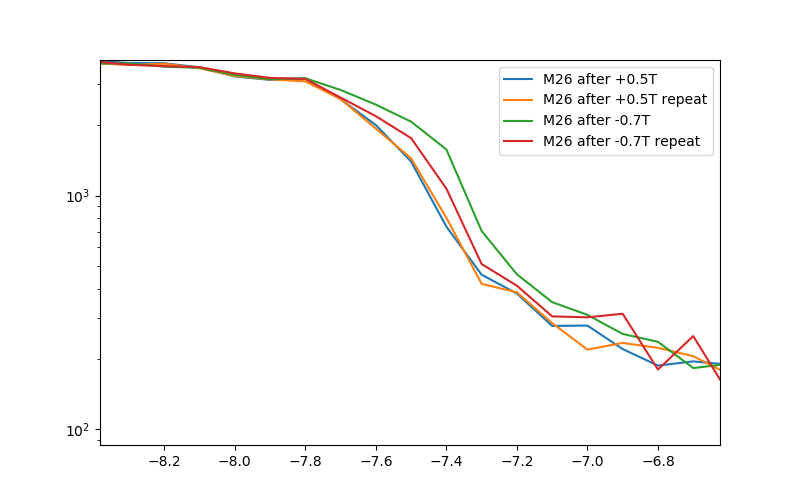

In [172]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data13.lockin865_X[:]/0.5e-9), label='M26 after +0.5T')
plt.semilogy(gvals, np.abs(data14.lockin865_X[:]/0.5e-9), label='M26 after +0.5T repeat')
plt.semilogy(gvals, np.abs(data15.lockin865_X[:]/0.5e-9), label='M26 after -0.7T')
plt.semilogy(gvals, np.abs(data16.lockin865_X[:]/0.5e-9), label='M26 after -0.7T repeat')
plt.legend()

# W5 fan diagram

In [173]:
srframe.volt_p1(-8)
time.sleep(15)
gvals = np.linspace(-8, 8, 401)
data17, plot17 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin865.R, lockin830.X, lockin830.Y, lockin830.R, DataName='W5_865_39-38_830_38-37_baseT_1nA_gatesweep')
srframe.volt_p1(0)

Started at 2020-02-03 17:21:21
DataSet:
   location = 'data/2020-02-03/#014_W5_865_39-38_830_38-37_baseT_1nA_gatesweep_17-21-18'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
   Measured | lockin865_R         | R            | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
   Measured | lockin830_R         | R            | (401,)
Finished at 2020-02-03 17:30:22


In [174]:
triton.magnet_sweeprate(0.1)

In [175]:
triton.magnet_POC(0)

In [176]:
triton.magnet_swh()

1

In [177]:
srframe.volt_p1(-7)
time.sleep(15)
gvals = np.linspace(-7, 7, 701)
bvals = np.linspace(0, 7, 141)
data18, plot18 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=15, SetDelay2=1.2, Param2_SetBetween=0, DataName='W5_865_39-38Rxx_830_38-37Rxx_baseT_2nA_B-Vgsweep')

Started at 2020-02-03 17:50:10
Please wait 10.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating

In [185]:
srframe.volt_p1(0)

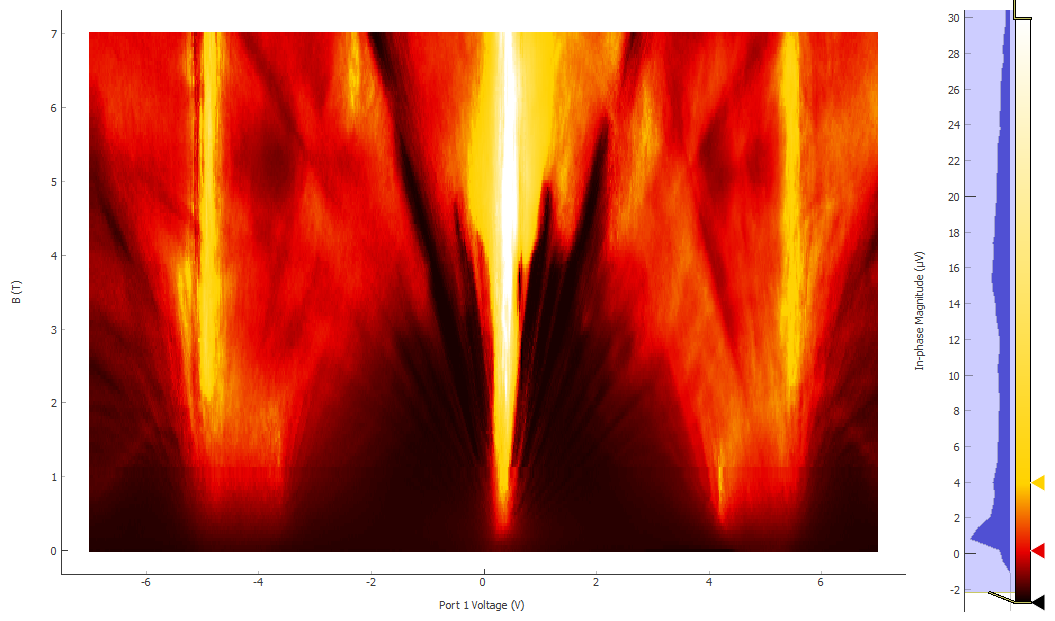

In [181]:
plot18[0]#39-38Rxx

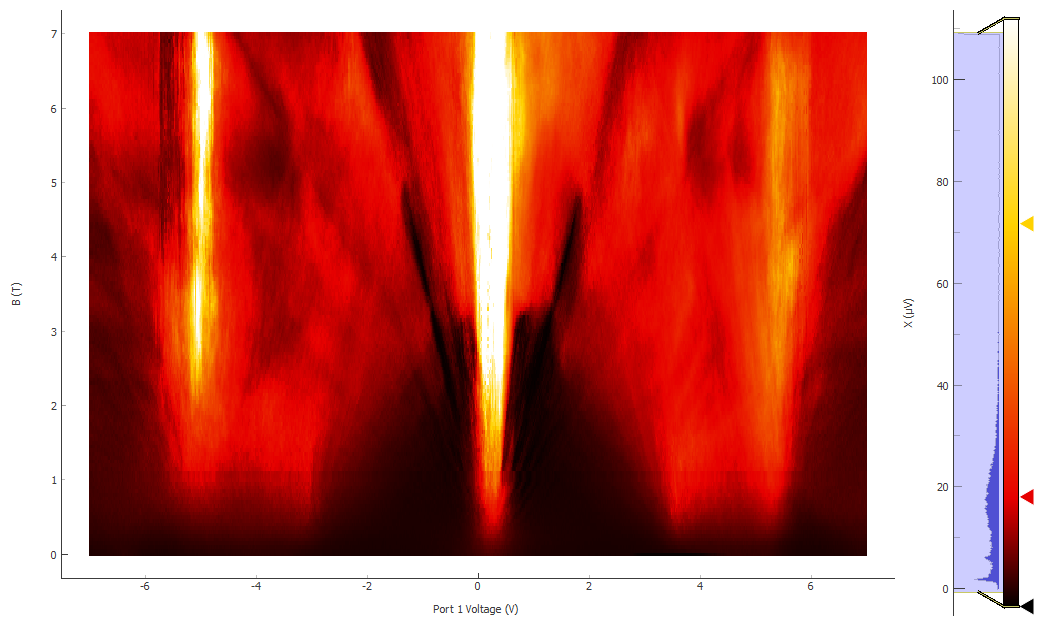

In [182]:
plot18[2]#38-37Rxx

In [183]:
srframe.volt_p1(-8)
time.sleep(15)
gvals = np.linspace(-8, 8, 401)
data19, plot19 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin865.R, lockin830.X, lockin830.Y, lockin830.R, DataName='W5_865_40-39Rxx_830_40-32Rxy_baseT_2nA_B=7T_gatesweep')
srframe.volt_p1(0)

Started at 2020-02-05 09:22:27
DataSet:
   location = 'data/2020-02-05/#001_W5_865_40-39Rxx_830_40-32Rxy_baseT_2nA_B=7T_gatesweep_09-22-25'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
   Measured | lockin865_R         | R            | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
   Measured | lockin830_R         | R            | (401,)
Finished at 2020-02-05 09:31:29


In [186]:
srframe.volt_p1(-7)
time.sleep(15)
gvals = np.linspace(-7, 7, 701)
bvals = np.linspace(7, 0, 141)
data20, plot20 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=15, SetDelay2=1.2, Param2_SetBetween=0, DataName='W5_865_40-39Rxx_830_40-32Rxy_baseT_2nA_B-Vgsweep')

Started at 2020-02-05 09:38:53
Please wait 10.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for opera

In [188]:
srframe.volt_p1(0)

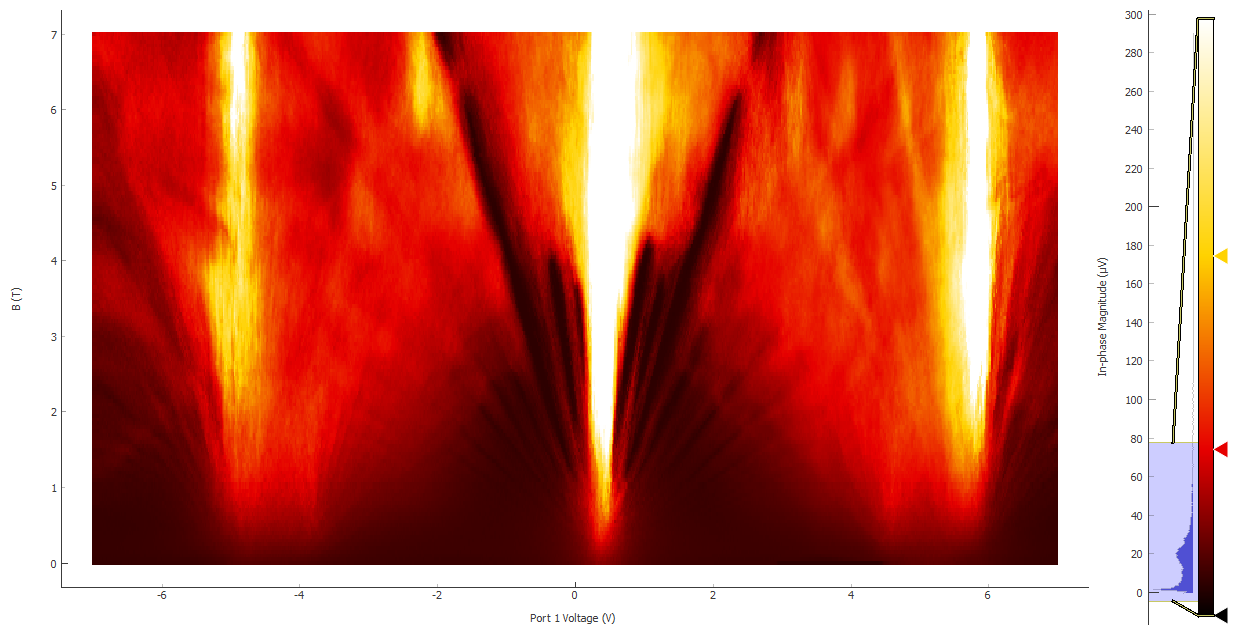

In [189]:
plot20[0]

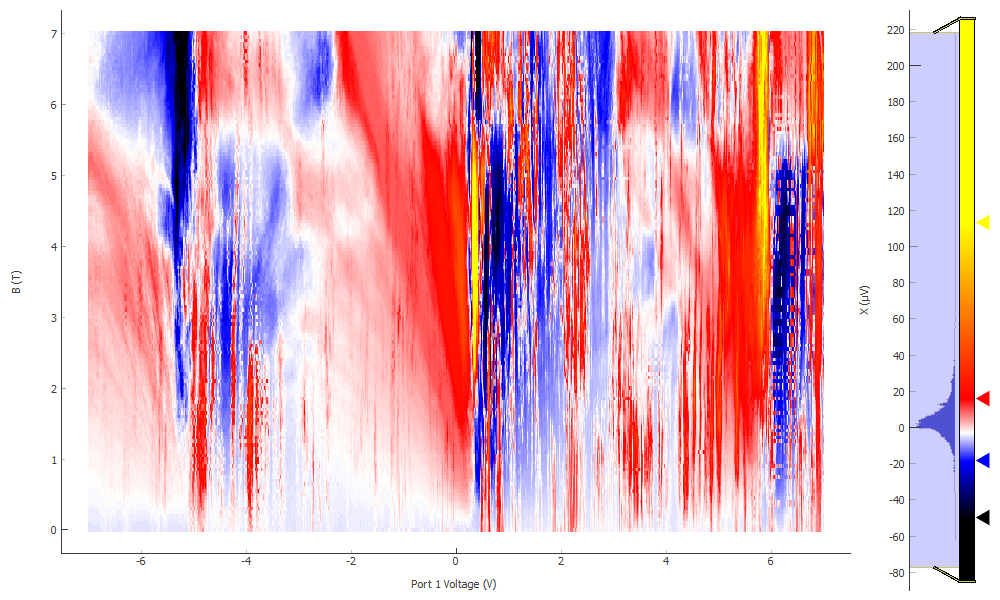

In [190]:
# Rxy was really messy, but it showed a few things on the hole side. Contact 32 is bad, so that's why
plot20[2]

In [191]:
triton.field()

7e-06

# W5 fraunhofer patterns

Unplugged the magnet temperature cable since the temperature is rather low.

First 40-39 on lockin830, 38-37 on lockin865 (lockin865 doesn't seem to zero out as well, for some reason, so this measurement may not work), 0.5 nA excitation (50 mV on a 100 MOhm resistor)

16.777 Hz, 3.3 V on the back gate seems to optimize it.

Take a course sweep first

In [192]:
triton.magnet_sweeprate(0.15)

In [195]:
triton.field(-0.05)

Sweep time approximately 15.994 seconds


In [194]:
triton.field()

-0.039981

In [209]:
# tried removing the ground connection from the breakout boxes and gate to SR865 right before the -40 mT sweep.
# Then tried floating the shields on the 865 (only the input) for the next sweep (-37.5 mT)
# Then I switched it back to the original configuration, with the braid connected to the ground on the back, and the shields grounded too
# It doesn't seem like any of these changes make any difference above the noise floor. Perhaps the only other thing to try would be to unground all shields, get rid of all possible ground loops

bvals = np.linspace(-0.05, 0.05, 41)
offvals = np.linspace(-5, 5, 101)
data21, plot21 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin830.X, lockin830.Y, lockin865.X, lockin865.Y, SetDelay1=12, SetDelay2=1.2, Param2_SetBetween=0, DataName='W5_830_49-39_865_38-37_vbg3p3V_FraunhoferbaseT_0p5nA_course')

Started at 2020-02-07 10:51:25
Please wait 10.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.488 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.542 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.488 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.506 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.482 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.5 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.5 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.488 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.494 seconds for the field sweep, plus the time required for operati

In [210]:
srframe.volt_p1(0)

# Back to M26 briefly

In [214]:
srframe.volt_p1(-15)
time.sleep(10)
gvals = np.linspace(-15, 15, 301)
data22, plot22 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M26_basetemp_0.2nA_29-28_865_29-2_830_source30_after+0.7T')
srframe.volt_p1(0)

Started at 2020-02-07 13:28:14
DataSet:
   location = 'data/2020-02-07/#004_M26_basetemp_0.2nA_29-28_865_29-2_830_source30_after+0.7T_13-28-12'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
   Measured | lockin830_X         | X            | (301,)
   Measured | lockin830_Y         | Y            | (301,)
Finished at 2020-02-07 13:35:27


In [215]:
srframe.volt_p1(-15)
time.sleep(10)
gvals = np.linspace(-15, 15, 301)
data23, plot23 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M26_basetemp_0.2nA_29-28_865_29-2_830_source30_after-0.7T')
srframe.volt_p1(0)

Started at 2020-02-07 14:05:50
DataSet:
   location = 'data/2020-02-07/#005_M26_basetemp_0.2nA_29-28_865_29-2_830_source30_after-0.7T_14-05-48'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
   Measured | lockin830_X         | X            | (301,)
   Measured | lockin830_Y         | Y            | (301,)
Finished at 2020-02-07 14:13:03


<IPython.core.display.Javascript object>


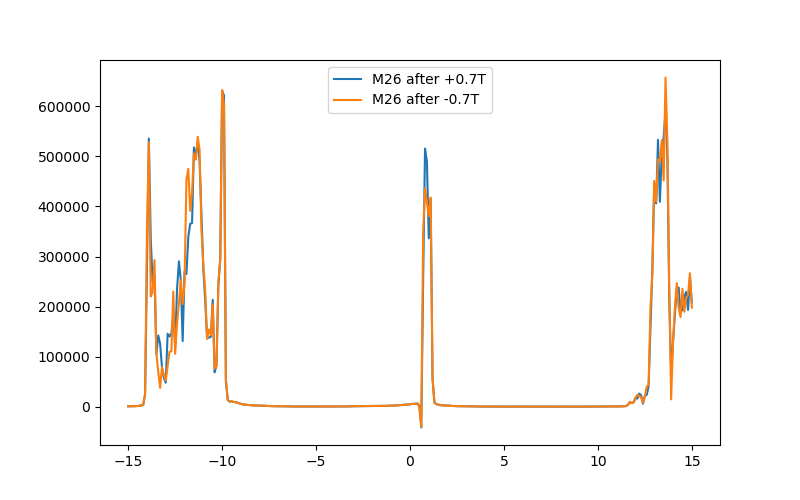

In [225]:
plt.figure(figsize=(8, 5))
plt.plot(data23.srframe_volt_p1_set[:], (data22.lockin865_X[:]/0.2e-9), label='M26 after +0.7T')
plt.plot(data23.srframe_volt_p1_set[:], (data23.lockin865_X[:]/0.2e-9), label='M26 after -0.7T')
plt.legend()

<IPython.core.display.Javascript object>


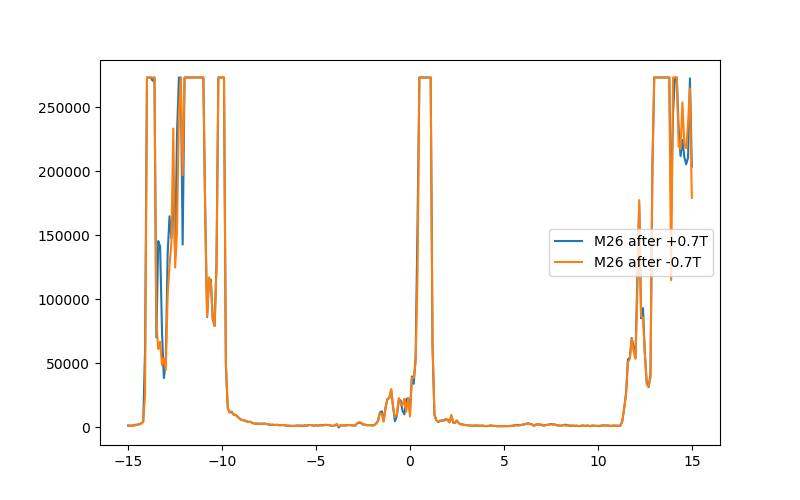

In [224]:
plt.figure(figsize=(8, 5))
plt.plot(data22.srframe_volt_p1_set[:], (data22.lockin830_X[:]/0.2e-9), label='M26 after +0.7T')
plt.plot(data23.srframe_volt_p1_set[:], (data23.lockin830_X[:]/0.2e-9), label='M26 after -0.7T')
plt.legend()

In [218]:
srframe.volt_p1(11.7)
time.sleep(10)
gvals = np.linspace(11.7, 13, 131)
data24, plot24 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M26_basetemp_0.2nA_29-28_865_28-2_830_source30_after-0.7T_zoom1')
srframe.volt_p1(0)

Started at 2020-02-07 14:21:38
DataSet:
   location = 'data/2020-02-07/#006_M26_basetemp_0.2nA_29-28_865_28-2_830_source30_after-0.7T_zoom1_14-21-36'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (131,)
   Measured | lockin865_X         | X            | (131,)
   Measured | lockin865_Y         | Y            | (131,)
   Measured | lockin830_X         | X            | (131,)
   Measured | lockin830_Y         | Y            | (131,)
Finished at 2020-02-07 14:24:27


<IPython.core.display.Javascript object>


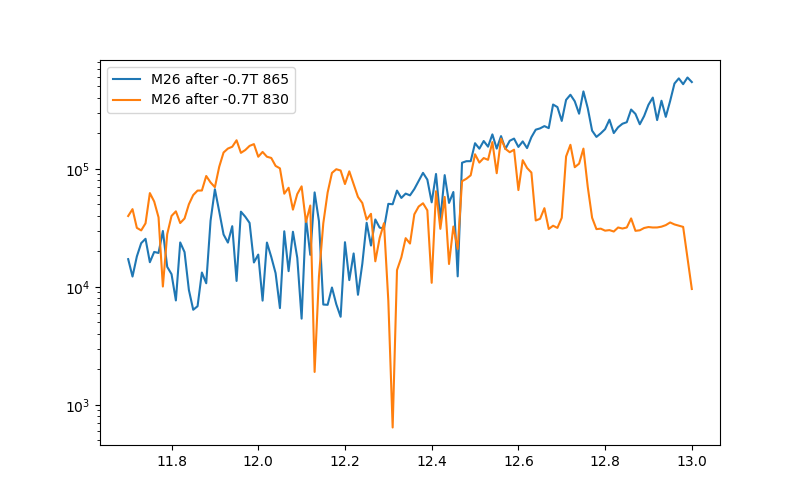

In [219]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data24.lockin865_X[:]/0.2e-9), label='M26 after -0.7T 865')
plt.semilogy(gvals, np.abs(data24.lockin830_X[:]/0.2e-9), label='M26 after -0.7T 830')
plt.legend()

In [226]:
srframe.volt_p1(11.7)
time.sleep(10)
gvals = np.linspace(2, 13, 111)
data25, plot25 = npd.single_param_sweep(srframe.volt_p1, gvals, 3.05, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M26_basetemp_2nA_29-28_865_28-2_830_source30_after-0.7T_zoom2')
srframe.volt_p1(0)

Started at 2020-02-07 14:39:03
DataSet:
   location = 'data/2020-02-07/#007_M26_basetemp_2nA_29-28_865_28-2_830_source30_after-0.7T_zoom2_14-39-01'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (111,)
   Measured | lockin865_X         | X            | (111,)
   Measured | lockin865_Y         | Y            | (111,)
   Measured | lockin830_X         | X            | (111,)
   Measured | lockin830_Y         | Y            | (111,)
Finished at 2020-02-07 14:45:38


In [261]:
triton.field(0)

Sweep time approximately 410.00199999999995 seconds


In [262]:
srframe.volt_p1(-10)
time.sleep(10)
gvals = np.linspace(-10, 10, 101)
data27, plot27 = npd.single_param_sweep(srframe.volt_p1, gvals, 3.05, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M26_basetemp_1nA_28-27_865_27-25_830_source30_after-1T_zoom1')
srframe.volt_p1(0)

Started at 2020-02-07 15:34:08
DataSet:
   location = 'data/2020-02-07/#009_M26_basetemp_1nA_28-27_865_27-25_830_source30_after-1T_zoom1_15-34-07'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (101,)
   Measured | lockin865_X         | X            | (101,)
   Measured | lockin865_Y         | Y            | (101,)
   Measured | lockin830_X         | X            | (101,)
   Measured | lockin830_Y         | Y            | (101,)
Finished at 2020-02-07 15:40:20


In [263]:
srframe.volt_p1(-10)
time.sleep(10)
gvals = np.linspace(-10, 10, 101)
data28, plot28 = npd.single_param_sweep(srframe.volt_p1, gvals, 3.05, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M26_basetemp_1nA_28-27_865_27-25_830_source30_after+1T_zoom1')
srframe.volt_p1(0)

Started at 2020-02-07 16:08:10
DataSet:
   location = 'data/2020-02-07/#010_M26_basetemp_1nA_28-27_865_27-25_830_source30_after+1T_zoom1_16-08-08'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (101,)
   Measured | lockin865_X         | X            | (101,)
   Measured | lockin865_Y         | Y            | (101,)
   Measured | lockin830_X         | X            | (101,)
   Measured | lockin830_Y         | Y            | (101,)
Finished at 2020-02-07 16:14:07


<IPython.core.display.Javascript object>


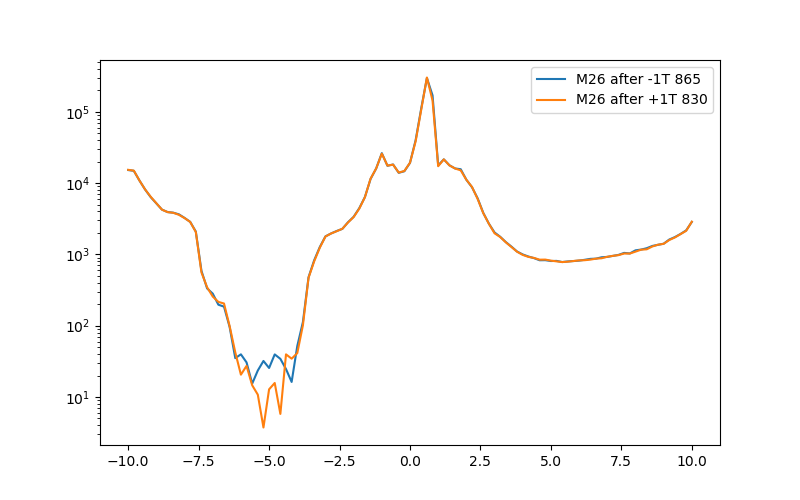

In [265]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data27.lockin865_X[:]/1e-9), label='M26 after -1T 865')
plt.semilogy(gvals, np.abs(data28.lockin865_X[:]/1e-9), label='M26 after +1T 830')
plt.legend()

In [266]:
lockin865.amplitude(0)

# Back to W5 fraunhofer

In [267]:
srframe.volt_p5()

0.0

In [268]:
srframe.volt_p1()

0.0

In [269]:
srframe.volt_p1(3.3)

In [272]:
# same as last fraunhofer but finer
bvals = np.linspace(-0.02, 0.02, 161)
offvals = np.linspace(-5, 5, 201)
data22, plot22 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin830.X, lockin830.Y, lockin865.X, lockin865.Y, SetDelay1=12, SetDelay2=1.2, Param2_SetBetween=0, DataName='W5_830_49-39_865_38-37_vbg3p3V_FraunhoferbaseT_0p5nA')

Started at 2020-02-07 17:18:16
Please wait 10.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.09 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.09 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.096 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.114 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.102 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.114 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.108 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.096 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.09 seconds for the field sweep, plus the time required for operat

In [273]:
srframe.volt_p5(0)
srframe.volt_p1(0)

In [274]:
triton.field(-0.0008)

Sweep time approximately 18.322 seconds


In [275]:
offvals = np.linspace(8000e-3, -8000e-3, 201)
gvals = np.linspace(2.5, 4.4, 39)
data23, plot23 = npd.twod_param_sweep(srframe.volt_p1, gvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=6, SetDelay2=1.1, DataName='W5_830_40-39_865_38-37_vbgsweep_AC0.5nAdvdi_baseT_b=-0.8mT')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-02-08 06:49:05
DataSet:
   location = 'data/2020-02-08/#001_W5_830_40-39_865_38-37_vbgsweep_AC0.5nAdvdi_baseT_b=-0.8mT_06-49-03'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (39,)
   Setpoint | srframe_volt_p5_set | volt_p5      | (39, 201)
   Measured | lockin865_X         | X            | (39, 201)
   Measured | lockin865_Y         | Y            | (39, 201)
   Measured | lockin830_X         | X            | (39, 201)
   Measured | lockin830_Y         | Y            | (39, 201)
Finished at 2020-02-08 09:50:14


In [276]:
srframe.volt_p1(3.3)

In [278]:
#the above measurement the resistance is not zero
#now reconnect the ground to SRS865

In [279]:
srframe.volt_p1(-8)
time.sleep(15)
gvals = np.linspace(-8, 8, 401)
data24, plot24 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin865.R, lockin830.X, lockin830.Y, lockin830.R, DataName='W5_865_39-38_830_40-39_baseT_1nA_gatesweep')
srframe.volt_p1(0)

Started at 2020-02-08 10:48:09
DataSet:
   location = 'data/2020-02-08/#002_W5_865_39-38_830_40-39_baseT_1nA_gatesweep_10-48-06'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
   Measured | lockin865_R         | R            | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
   Measured | lockin830_R         | R            | (401,)
Finished at 2020-02-08 10:57:11


In [281]:
srframe.volt_p1(-8)
time.sleep(15)
gvals = np.linspace(-8, 8, 401)
data25, plot25 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin830.X, lockin830.Y, lockin830.R, DataName='W5_830_40-39_baseT_1nA_gatesweep')
srframe.volt_p1(0)

Started at 2020-02-08 11:04:05
DataSet:
   location = 'data/2020-02-08/#003_W5_830_40-39_baseT_1nA_gatesweep_11-04-04'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
   Measured | lockin830_R         | R            | (401,)
Finished at 2020-02-08 11:12:32


In [282]:
srframe.volt_p1(-8)
time.sleep(15)
gvals = np.linspace(-8, 8, 401)
data26, plot26 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin830.X, lockin830.Y, lockin830.R, DataName='W5_830_40-39_baseT_1nA_gatesweep_0T')
srframe.volt_p1(0)

Started at 2020-02-08 11:14:57
DataSet:
   location = 'data/2020-02-08/#004_W5_830_40-39_baseT_1nA_gatesweep_0T_11-14-56'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
   Measured | lockin830_R         | R            | (401,)
Finished at 2020-02-08 11:23:24


<IPython.core.display.Javascript object>


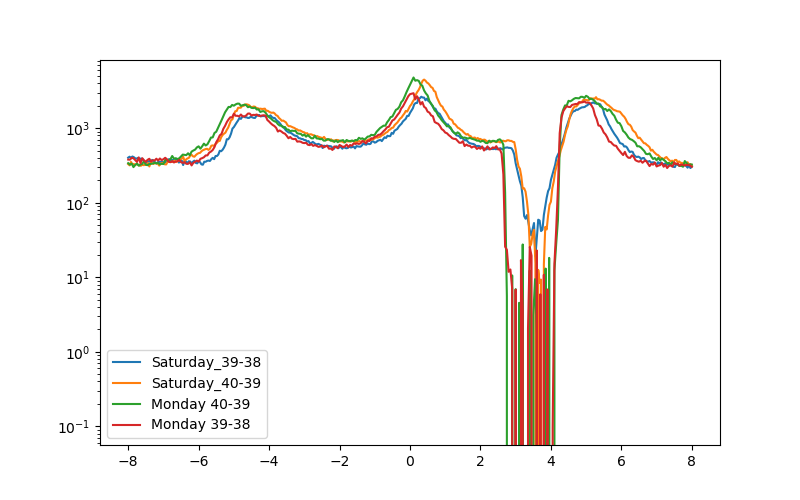

In [288]:
gvals2 = data7.srframe_volt_p1_set[:]
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, data24.lockin865_X[:]/1e-9, label='Saturday_39-38')
plt.semilogy(gvals, data24.lockin830_X[:]/1e-9, label='Saturday_40-39')
plt.semilogy(gvals2, data7.lockin865_X[:]/1e-9, label='Monday 40-39')
plt.semilogy(gvals2, data6.lockin865_X[:]/1e-9, label='Monday 39-38')
plt.legend()

In [287]:
#either the device changes or the measurement ground changes

In [289]:
offvals = np.linspace(8000e-3, -8000e-3, 201)
gvals = np.linspace(2.5, 4.4, 39)
data27, plot27 = npd.twod_param_sweep(srframe.volt_p1, gvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=6, SetDelay2=1.1, DataName='W5_830_40-39_865_39-38_vbgsweep_AC0.5nAdvdi_baseT_b=-0.8mT')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-02-08 11:38:06
DataSet:
   location = 'data/2020-02-08/#005_W5_830_40-39_865_39-38_vbgsweep_AC0.5nAdvdi_baseT_b=-0.8mT_11-38-04'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (39,)
   Setpoint | srframe_volt_p5_set | volt_p5      | (39, 201)
   Measured | lockin865_X         | X            | (39, 201)
   Measured | lockin865_Y         | Y            | (39, 201)
   Measured | lockin830_X         | X            | (39, 201)
   Measured | lockin830_Y         | Y            | (39, 201)
Finished at 2020-02-08 14:39:28


In [292]:
srframe.volt_p1(-8)#865 and 830 both grounded
time.sleep(15)
gvals = np.linspace(-8, 8, 321)
data28, plot28 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W5_830_40-39_865_39-38_baseT_1nA_gatesweep_0T')
srframe.volt_p1(0)

Started at 2020-02-08 15:02:04
DataSet:
   location = 'data/2020-02-08/#006_W5_830_40-39_865_39-38_baseT_1nA_gatesweep_0T_15-02-02'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (321,)
   Measured | lockin865_X         | X            | (321,)
   Measured | lockin865_Y         | Y            | (321,)
   Measured | lockin830_X         | X            | (321,)
   Measured | lockin830_Y         | Y            | (321,)
Finished at 2020-02-08 15:08:57


In [293]:
srframe.volt_p1(-8)#865 grounded, disconnect 830 ground screw
time.sleep(15)
gvals = np.linspace(-8, 8, 321)
data29, plot29 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W5_830_40-39_865_39-38_baseT_1nA_gatesweep_0T')
srframe.volt_p1(0)

Started at 2020-02-08 15:15:51
DataSet:
   location = 'data/2020-02-08/#007_W5_830_40-39_865_39-38_baseT_1nA_gatesweep_0T_15-15-49'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (321,)
   Measured | lockin865_X         | X            | (321,)
   Measured | lockin865_Y         | Y            | (321,)
   Measured | lockin830_X         | X            | (321,)
   Measured | lockin830_Y         | Y            | (321,)
Finished at 2020-02-08 15:22:43


<IPython.core.display.Javascript object>


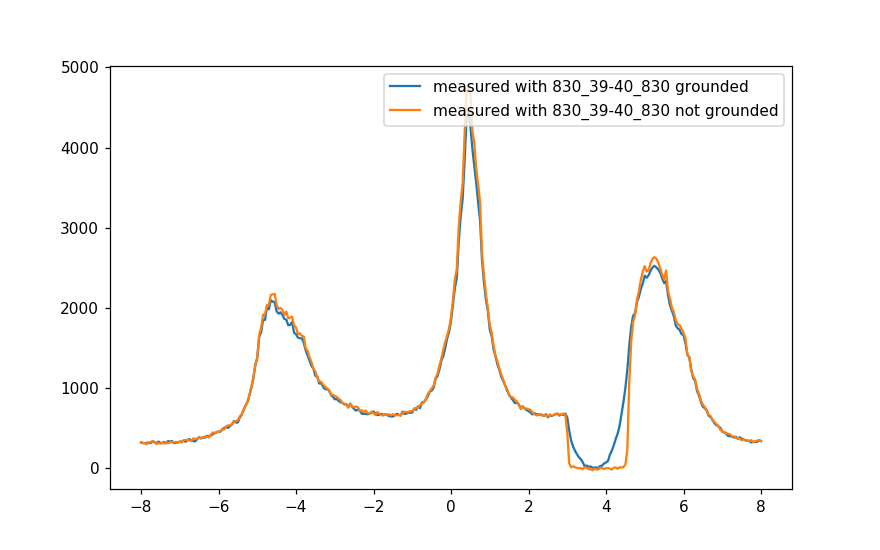

In [298]:
plt.figure(figsize=(8, 5))
plt.plot(gvals, data28.lockin830_X[:]/1e-9, label='measured with 830_39-40_830 grounded')
plt.plot(gvals, data29.lockin830_X[:]/1e-9, label='measured with 830_39-40_830 not grounded')
plt.legend()

<IPython.core.display.Javascript object>


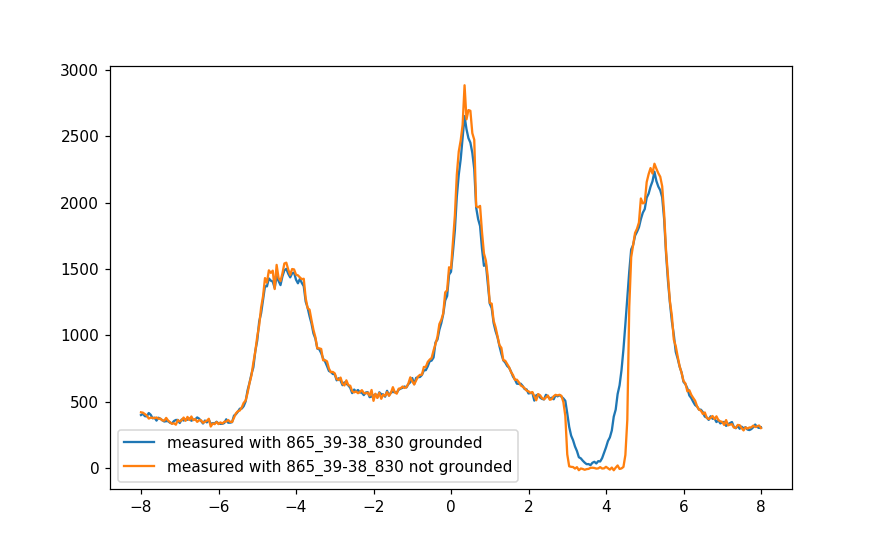

In [299]:
plt.figure(figsize=(8, 5))
plt.plot(gvals, data28.lockin865_X[:]/1e-9, label='measured with 865_39-38_830 grounded')
plt.plot(gvals, data29.lockin865_X[:]/1e-9, label='measured with 865_39-38_830 not grounded')
plt.legend()

In [301]:
srframe.volt_p1(3.4)#830 not grounded
srframe.volt_p5(8)
time.sleep(15)
offvals = np.linspace(8000e-3, -8000e-3, 201)
data30, plot30 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W5_830_40-39_865_39-38_baseT_0.5nA_dvdi_-0.8mT')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-02-08 15:41:07
DataSet:
   location = 'data/2020-02-08/#008_W5_830_40-39_865_39-38_baseT_0.5nA_dvdi_-0.8mT_15-41-05'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
   Measured | lockin830_X         | X            | (201,)
   Measured | lockin830_Y         | Y            | (201,)
Finished at 2020-02-08 15:45:25


In [302]:
offvals = np.linspace(8000e-3, -8000e-3, 201)# 865grounded 830 not grounded
gvals = np.linspace(2.5, 4.4, 39)
data31, plot31 = npd.twod_param_sweep(srframe.volt_p1, gvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=6, SetDelay2=1.1, DataName='W5_830_40-39_865_39-38_vbgsweep_AC0.5nAdvdi_baseT_b=-0.8mT')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-02-08 15:46:40
DataSet:
   location = 'data/2020-02-08/#009_W5_830_40-39_865_39-38_vbgsweep_AC0.5nAdvdi_baseT_b=-0.8mT_15-46-38'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (39,)
   Setpoint | srframe_volt_p5_set | volt_p5      | (39, 201)
   Measured | lockin865_X         | X            | (39, 201)
   Measured | lockin865_Y         | Y            | (39, 201)
   Measured | lockin830_X         | X            | (39, 201)
   Measured | lockin830_Y         | Y            | (39, 201)
Finished at 2020-02-08 18:47:52


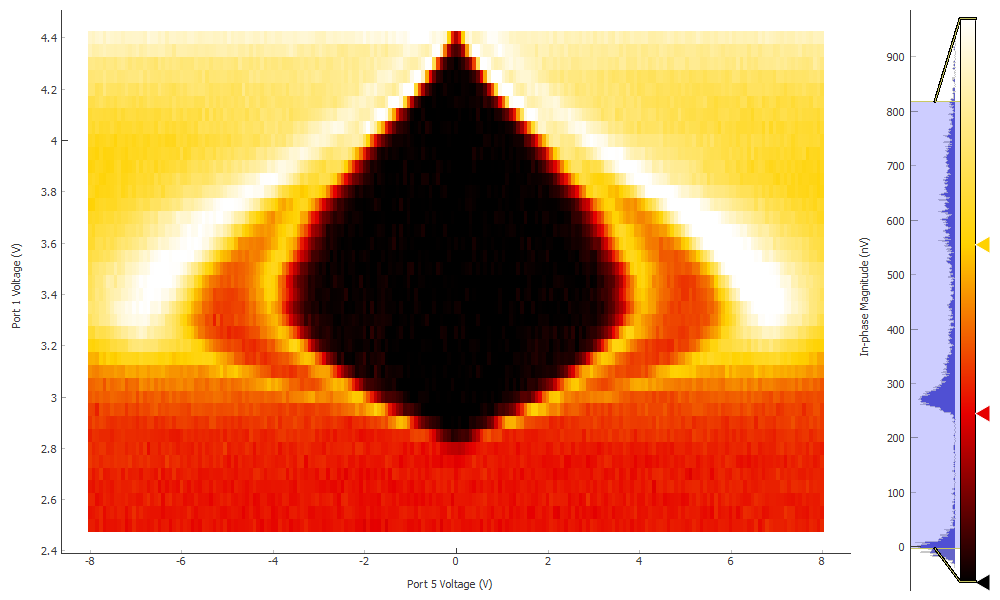

In [303]:
plot31[0]#38-39 dvdi gate dependence

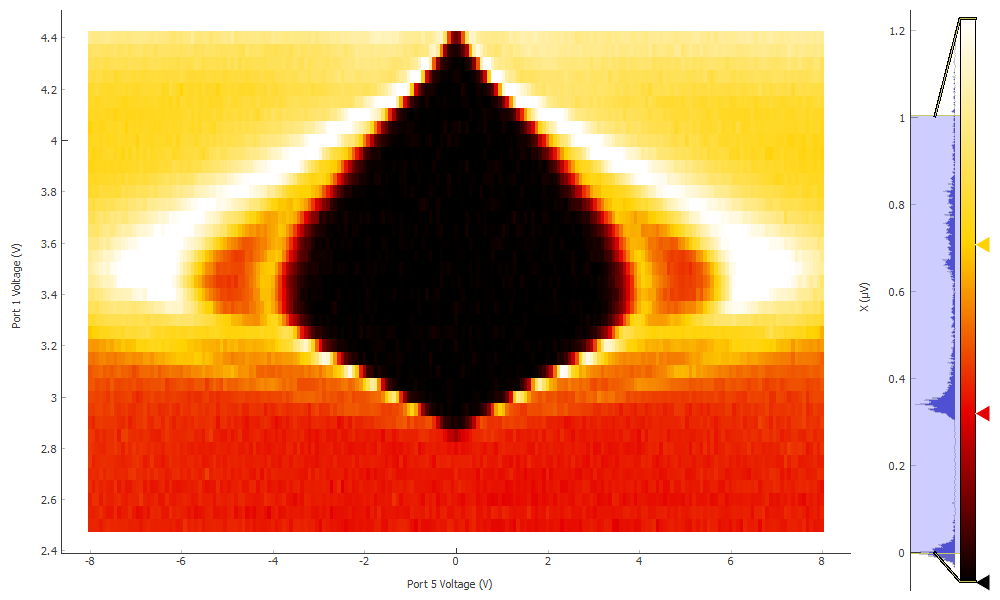

In [304]:
plot31[2]#39-40 dvdi gate dependence

In [306]:
srframe.volt_p1(3.4)#830 not grounded
srframe.volt_p5(-10)
time.sleep(15)
bvals = np.linspace(-0.025, 0.025, 51)
offvals = np.linspace(-10, 10, 101)
data32, plot32 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin830.X, lockin830.Y, lockin865.X, lockin865.Y, SetDelay1=12, SetDelay2=1.2, Param2_SetBetween=0, DataName='W5_830_40-39_865_39-38_vbg3p4V_FraunhoferbaseT_0p5nA_course')

Started at 2020-02-08 19:03:29
Please wait 10.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.402 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.426 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.378 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.402 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.408 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.414 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.408 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.384 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.396 seconds for the field sweep, plus the time required for ope

In [307]:
srframe.volt_p5(0)

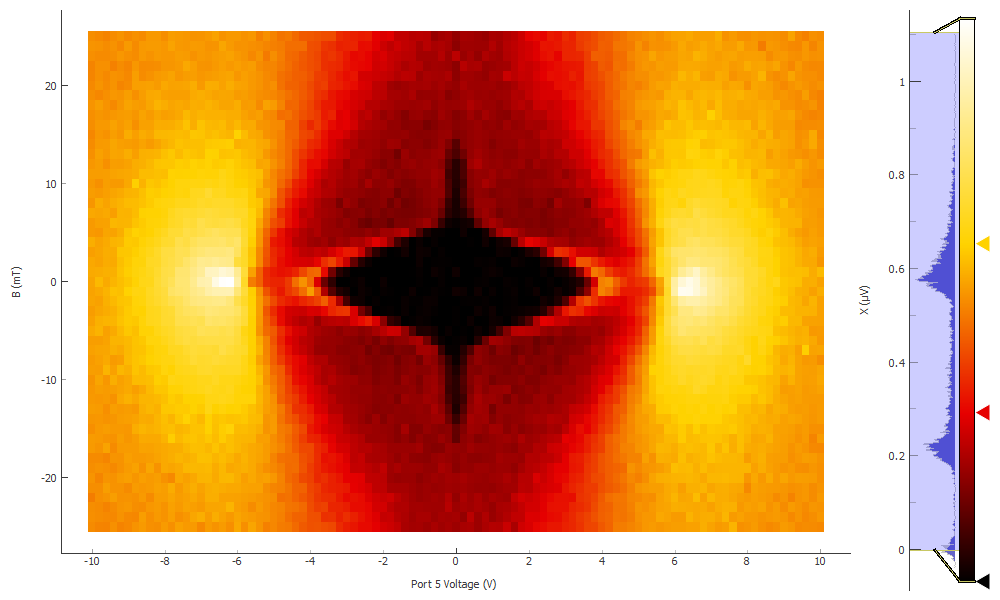

In [308]:
plot32[0]#40-39 Vg=3.4V

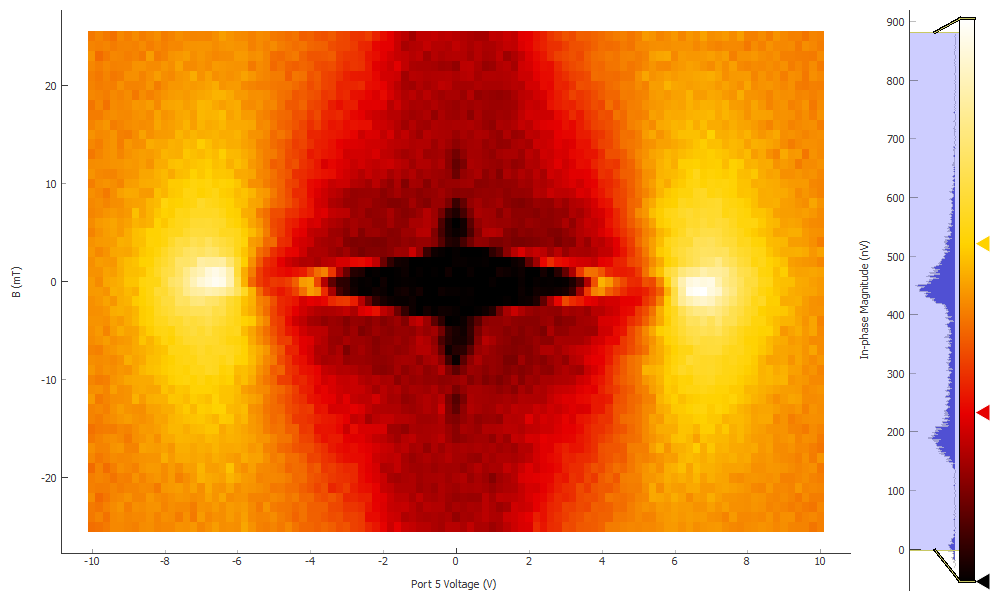

In [309]:
plot32[2]#39-38 Vg=3.4V

In [311]:
srframe.volt_p1()

3.4

In [312]:
lockin865.amplitude()

0.04999999702

In [313]:
# same as last fraunhofer but finer
bvals = np.linspace(-0.02, 0.02, 161)
offvals = np.linspace(-6, 6, 241)
data33, plot33 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin830.X, lockin830.Y, lockin865.X, lockin865.Y, SetDelay1=12, SetDelay2=1.2, Param2_SetBetween=0, DataName='W5_830_40-39_865_39-38_vbg3p4V_FraunhoferbaseT_0p5nA')

Started at 2020-02-08 22:13:41
Please wait 28.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.078 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.108 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.09 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.096 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.108 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.06 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.096 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.102 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.096 seconds for the field sweep, plus the time required for operati

In [314]:
srframe.volt_p5(0)
srframe.volt_p1(0)

In [315]:
triton.field(-0.0008)

Sweep time approximately 18.322 seconds


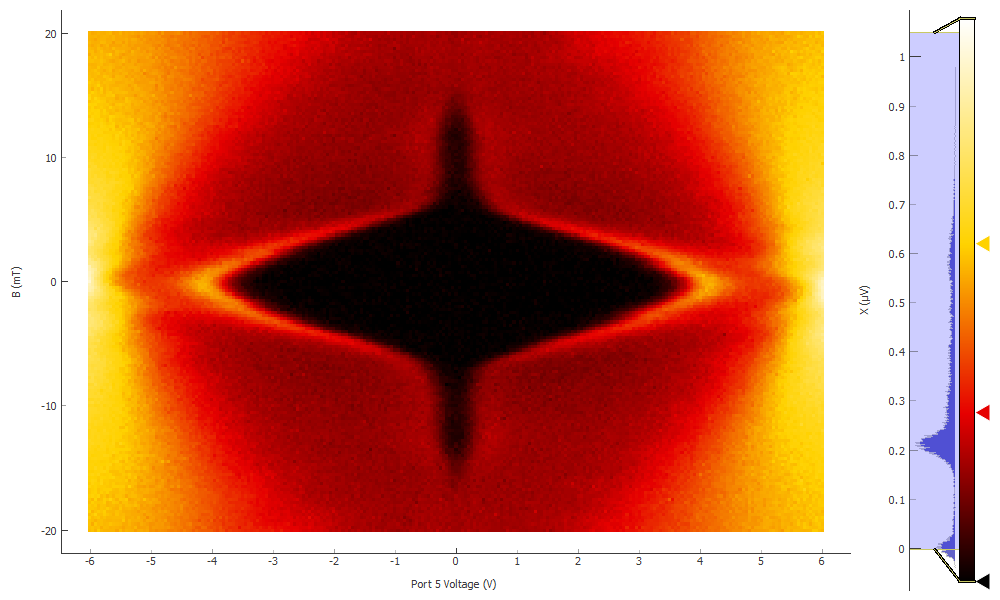

In [316]:
plot33[0]#40-39 Vg=3.4V

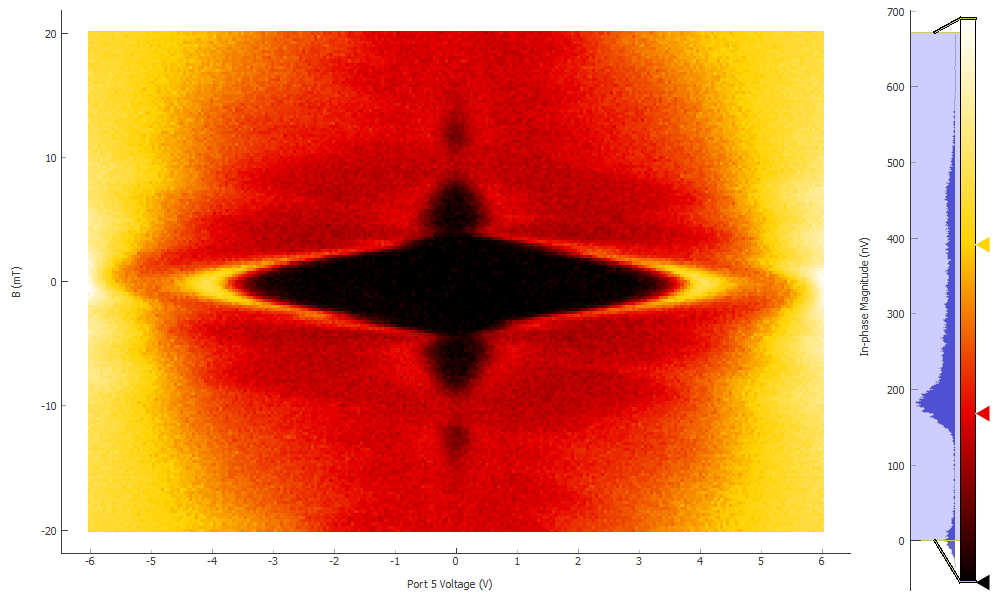

In [317]:
plot33[2]#39-38 Vg=3.4V

In [318]:
#now 865 to 38-37, 830 stays 40-39

In [319]:
srframe.volt_p1(-8)#865 grounded, disconnect 830 ground screw
time.sleep(15)
gvals = np.linspace(-8, 8, 321)
data34, plot34 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W5_830_40-39_865_38-37_baseT_1nA_gatesweep_-0.8mT')
srframe.volt_p1(0)

Started at 2020-02-09 14:32:50
DataSet:
   location = 'data/2020-02-09/#001_W5_830_40-39_865_38-37_baseT_1nA_gatesweep_-0.8mT_14-32-48'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (321,)
   Measured | lockin865_X         | X            | (321,)
   Measured | lockin865_Y         | Y            | (321,)
   Measured | lockin830_X         | X            | (321,)
   Measured | lockin830_Y         | Y            | (321,)
Finished at 2020-02-09 14:39:55


In [320]:
offvals = np.linspace(6000e-3, -6000e-3, 151)# 865grounded 830 not grounded
gvals = np.linspace(2.6, 4.4, 37)
data35, plot35 = npd.twod_param_sweep(srframe.volt_p1, gvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=6, SetDelay2=1.1, DataName='W5_830_40-39_865_38-37_vbgsweep_AC0.5nAdvdi_baseT_b=-0.8mT')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-02-09 14:47:29
DataSet:
   location = 'data/2020-02-09/#002_W5_830_40-39_865_38-37_vbgsweep_AC0.5nAdvdi_baseT_b=-0.8mT_14-47-27'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (37,)
   Setpoint | srframe_volt_p5_set | volt_p5      | (37, 151)
   Measured | lockin865_X         | X            | (37, 151)
   Measured | lockin865_Y         | Y            | (37, 151)
   Measured | lockin830_X         | X            | (37, 151)
   Measured | lockin830_Y         | Y            | (37, 151)
Finished at 2020-02-09 16:57:28


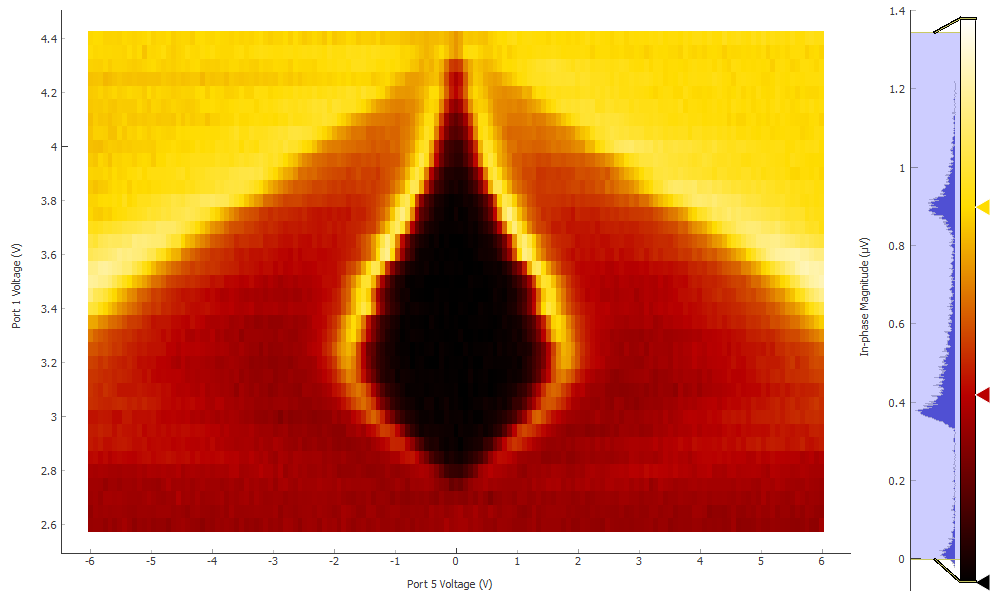

In [321]:
plot35[0]#38-37 dvdi gate dependence

In [322]:
srframe.volt_p1(3.2)#830 not grounded
srframe.volt_p5(-5)
time.sleep(15)
bvals = np.linspace(-0.025, 0.025, 41)
offvals = np.linspace(-5, 5, 101)
data36, plot36 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin830.X, lockin830.Y, lockin865.X, lockin865.Y, SetDelay1=12, SetDelay2=1.2, Param2_SetBetween=0, DataName='W5_830_40-39_865_38-37_vbg3p2V_FraunhoferbaseT_0p5nA_course')

Started at 2020-02-09 17:06:49
Please wait 19.683999999999997 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.534 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.504 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.456 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.504 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.492 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.504 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.498 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.498 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.486 seconds for the field sweep, plus the time requ

In [323]:
# same as last fraunhofer but finer
srframe.volt_p1(3.2)
srframe.volt_p5(-5)
time.sleep(15)
bvals = np.linspace(-0.02, 0.02, 161)
offvals = np.linspace(-5, 5, 201)
data37, plot37 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin830.X, lockin830.Y, lockin865.X, lockin865.Y, SetDelay1=12, SetDelay2=1.2, Param2_SetBetween=0, DataName='W5_830_40-39_865_38-37_vbg3p2V_FraunhoferbaseT_0p5nA')

Started at 2020-02-09 18:54:47
Please wait 25.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.06 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.096 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.09 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.096 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.06 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.096 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.108 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.096 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.102 seconds for the field sweep, plus the time required for operat

In [324]:
srframe.volt_p1(0)
srframe.volt_p5(0)

In [325]:
triton.field(-0.0008)

Sweep time approximately 18.310000000000002 seconds


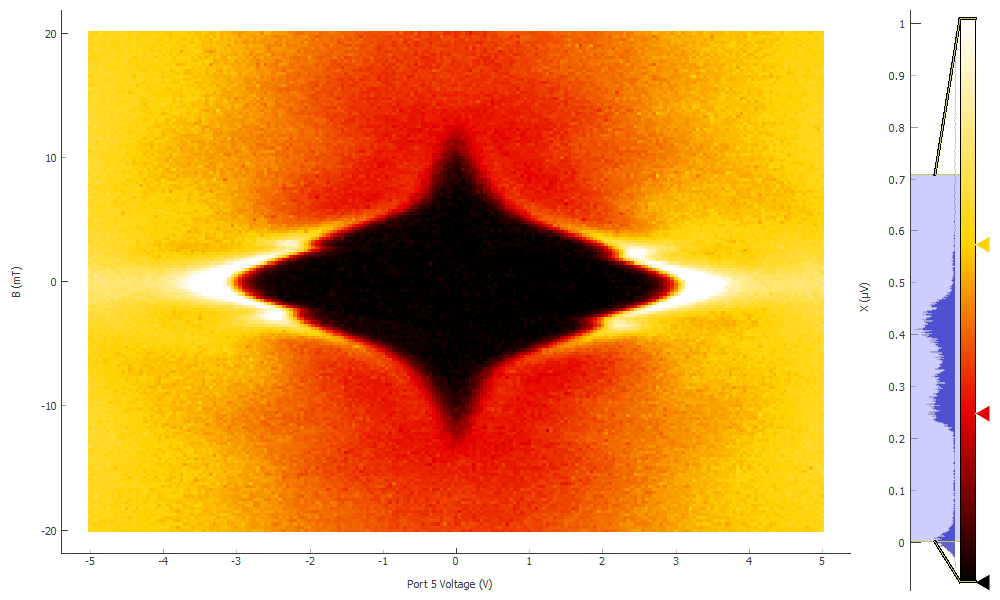

In [326]:
plot37[0]#40-39Vg=3.2V

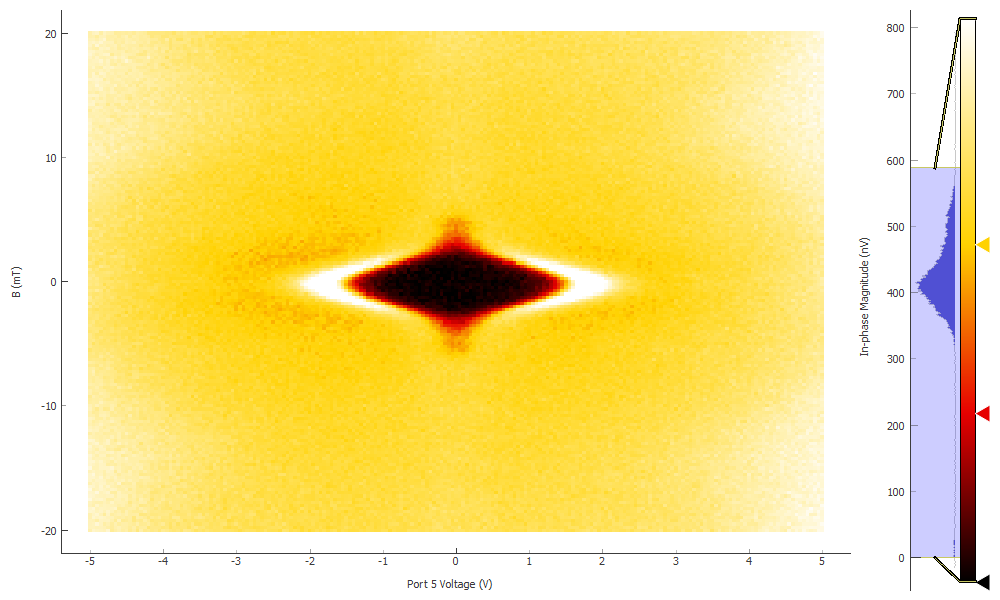

In [328]:
plot37[2]#38-37 Vg=3.2V

In [329]:
srframe.volt_p1(-8)#865 grounded, disconnect 830 ground screw
time.sleep(15)
gvals = np.linspace(-8, 8, 321)
data38, plot38 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W5_830_40-39_865_38-37_baseT_1nA_gatesweep_-0.8mT')
srframe.volt_p1(0)

Started at 2020-02-10 09:51:18
DataSet:
   location = 'data/2020-02-10/#001_W5_830_40-39_865_38-37_baseT_1nA_gatesweep_-0.8mT_09-51-16'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (321,)
   Measured | lockin865_X         | X            | (321,)
   Measured | lockin865_Y         | Y            | (321,)
   Measured | lockin830_X         | X            | (321,)
   Measured | lockin830_Y         | Y            | (321,)
Finished at 2020-02-10 09:58:10


# initial check on W3

In [330]:
srframe.volt_p1(-9)#865 grounded, disconnect 830 ground screw
time.sleep(15)
gvals = np.linspace(-9, 9, 361)
data39, plot39 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='W5_865_47-48_baseT_1nA_gatesweep_-0.8mT')
srframe.volt_p1(0)

Started at 2020-02-10 10:23:35
DataSet:
   location = 'data/2020-02-10/#002_W5_865_47-48_baseT_1nA_gatesweep_-0.8mT_10-23-34'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (361,)
   Measured | lockin865_X         | X            | (361,)
   Measured | lockin865_Y         | Y            | (361,)
Finished at 2020-02-10 10:30:53


In [332]:
srframe.volt_p1(-9)#865 grounded, disconnect 830 ground screw
time.sleep(15)
gvals = np.linspace(-9, 9, 361)
data40, plot40 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='W5_865_48-24_baseT_1nA_gatesweep_-0.8mT')
srframe.volt_p1(0)

Started at 2020-02-10 10:35:06
DataSet:
   location = 'data/2020-02-10/#003_W5_865_48-24_baseT_1nA_gatesweep_-0.8mT_10-35-05'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (361,)
   Measured | lockin865_X         | X            | (361,)
   Measured | lockin865_Y         | Y            | (361,)
Finished at 2020-02-10 10:42:38


<IPython.core.display.Javascript object>


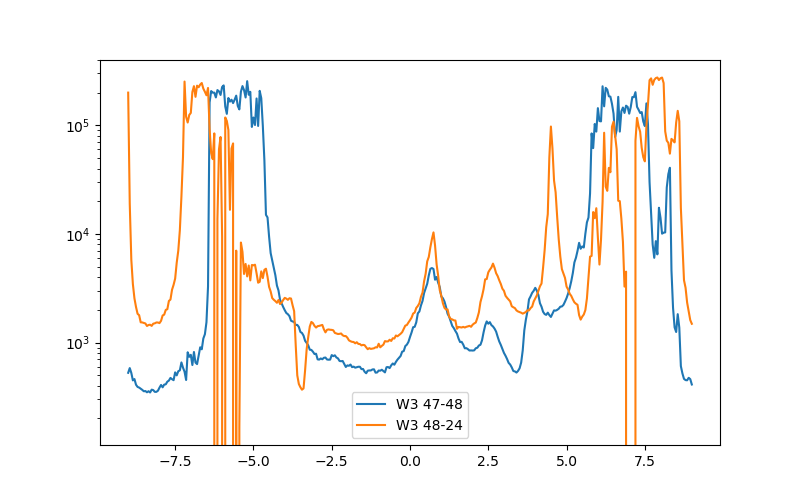

In [381]:
gvals3= data39.srframe_volt_p1_set[:]
plt.figure(figsize=(8, 5))
plt.semilogy(gvals3, data39.lockin865_X[:]/1e-9, label='W3 47-48')
plt.semilogy(gvals3, data40.lockin865_X[:]/1e-9, label='W3 48-24')
plt.legend()

In [337]:
srframe.volt_p1(-4)

In [338]:
srframe.volt_p1(-4)#830 not grounded
srframe.volt_p5(5)
time.sleep(30)
offvals = np.linspace(5000e-3, -5000e-3, 201)
data41, plot41 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='W3_865_48-24_baseT_0.5nA_dvdi_-0.8mT')

Started at 2020-02-10 11:06:19
DataSet:
   location = 'data/2020-02-10/#005_W3_865_48-24_baseT_0.5nA_dvdi_-0.8mT_11-06-18'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-02-10 11:10:23


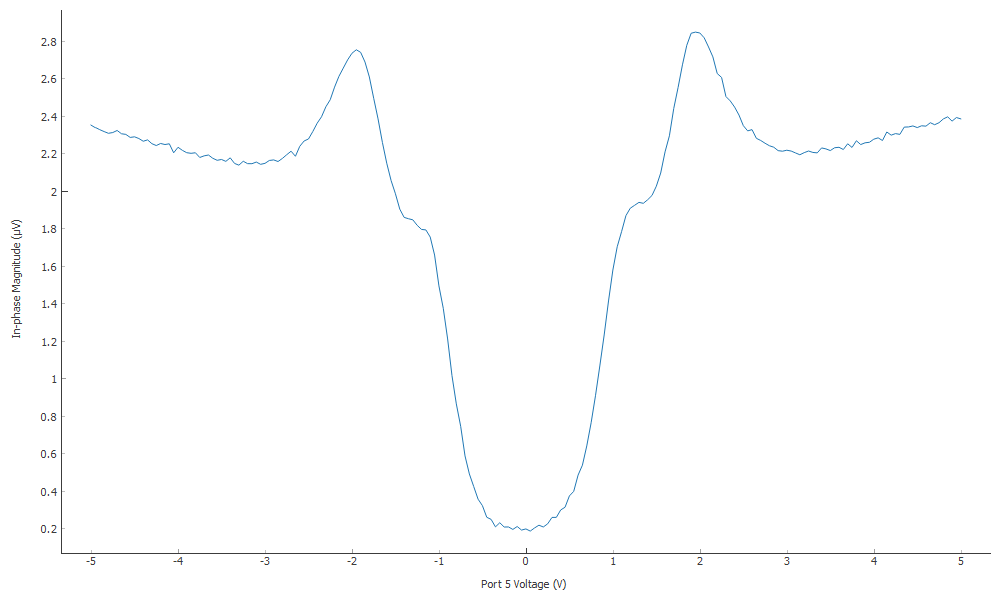

In [339]:
plot41[0]

In [340]:
srframe.volt_p1(-4.5)#830 not grounded
srframe.volt_p5(3)
time.sleep(60)
offvals = np.linspace(3000e-3, -3000e-3, 151)# 865grounded 830 not grounded
gvals = np.linspace(-4.5, -3.5, 21)
data42, plot42 = npd.twod_param_sweep(srframe.volt_p1, gvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, SetDelay1=15, SetDelay2=1.1, DataName='W3_865_48-24_vbgsweep_AC0.5nAdvdi_baseT_b=-0.8mT')
srframe.volt_p5(0)

Started at 2020-02-10 11:23:25
DataSet:
   location = 'data/2020-02-10/#006_W3_865_48-24_vbgsweep_AC0.5nAdvdi_baseT_b=-0.8mT_11-23-23'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (21,)
   Setpoint | srframe_volt_p5_set | volt_p5      | (21, 151)
   Measured | lockin865_X         | X            | (21, 151)
   Measured | lockin865_Y         | Y            | (21, 151)
Finished at 2020-02-10 12:34:12


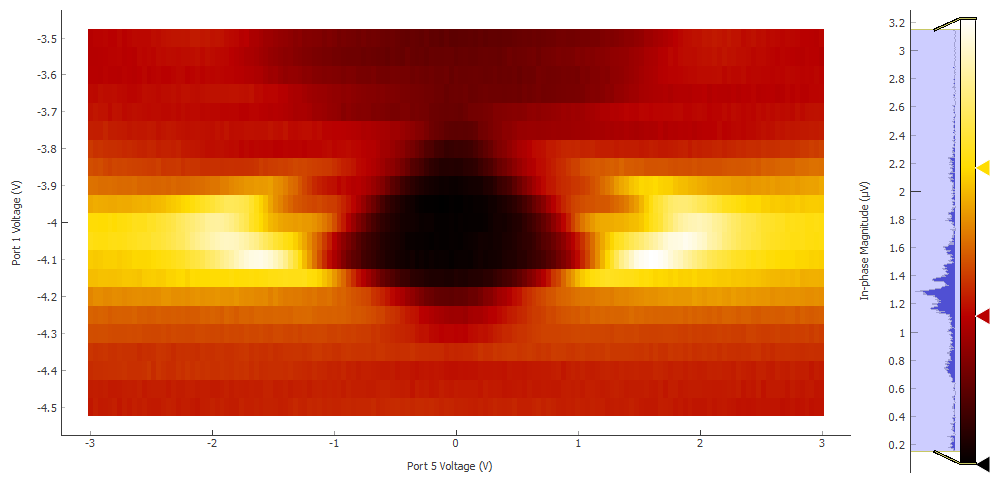

In [341]:
plot42[0]

In [342]:
srframe.volt_p1(-4.05)

In [343]:
srframe.volt_p5(-3)
time.sleep(15)
bvals = np.linspace(-0.020, 0.020, 41)
offvals = np.linspace(-3, 3, 121)
data43, plot43 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, SetDelay1=12, SetDelay2=1.2, Param2_SetBetween=0, DataName='W3_865_48-24_vbg-4p05V_FraunhoferbaseT_0p5nA_course')

Started at 2020-02-10 13:10:18
Please wait 17.68 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.414 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.396 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.372 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.396 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.396 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.402 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.396 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.396 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.402 seconds for the field sweep, plus the time required for oper

In [345]:
srframe.volt_p5(-3)
time.sleep(15)
bvals = np.linspace(-0.060, 0, 61)
offvals = np.linspace(-3, 3, 121)
data44, plot44 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, SetDelay1=12, SetDelay2=1.2, Param2_SetBetween=0, DataName='W3_865_48-24_vbg-4p05V_FraunhoferbaseT_0p5nA_course')

Started at 2020-02-10 14:36:36
Please wait 18.4 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.402 seconds for the field sweep, plus the time required for operating the switch...
DataSet:
   location = 'data/2020-02-10/#009_W3_865_48-24_vbg-4p05V_FraunhoferbaseT_0p5nA_course_14-36-35'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (61,)
   Setpoint | srframe_volt_p5_set         | volt_p5          | (61, 121)
   Measured | lockin865_X                 | X                | (61, 121)
   Measured | lockin865_Y                 | Y                | (61, 121)
Finished at 2020-02-10 14:40:46
Keyboard Interrupt


In [346]:
srframe.volt_p1(0)

In [347]:
srframe.volt_p5(0)

# Low frequency check on M26

In [350]:
srframe.volt_p1(-15)
time.sleep(10)
gvals = np.linspace(-15, 15, 301)
data45, plot45 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M26_basetemp_0.2nA_29-28_865_28-2_830_source30_+0.1T')
srframe.volt_p1(0)

Started at 2020-02-10 15:00:55
DataSet:
   location = 'data/2020-02-10/#010_M26_basetemp_0.2nA_29-28_865_28-2_830_source30_+0.1T_15-00-53'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
   Measured | lockin830_X         | X            | (301,)
   Measured | lockin830_Y         | Y            | (301,)
Finished at 2020-02-10 15:08:09


In [351]:
srframe.volt_p1(-11)
time.sleep(10)
gvals = np.linspace(-11, 13, 241)
data46, plot46 = npd.single_param_sweep(srframe.volt_p1, gvals, 3.05, lockin865.X, lockin865.Y, DataName='M26_basetemp_0.2nA_28-27_865_source30_+0.0T_4.89Hz')
srframe.volt_p1(0)

Started at 2020-02-10 15:26:38
DataSet:
   location = 'data/2020-02-10/#011_M26_basetemp_0.2nA_28-27_865_source30_+0.0T_4.89Hz_15-26-37'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (241,)
   Measured | lockin865_X         | X            | (241,)
   Measured | lockin865_Y         | Y            | (241,)
Finished at 2020-02-10 15:39:58


In [353]:
lockin865.harmonic(2)

In [354]:
srframe.volt_p1(-11)
time.sleep(10)
gvals = np.linspace(-11, 13, 241)
data47, plot47 = npd.single_param_sweep(srframe.volt_p1, gvals, 3.05, lockin865.X, lockin865.Y, DataName='M26_basetemp_0.2nA_28-27_865_source30_+0.0T_4.89Hz_2ndHarm')
srframe.volt_p1(0)

Started at 2020-02-10 15:57:38
DataSet:
   location = 'data/2020-02-10/#012_M26_basetemp_0.2nA_28-27_865_source30_+0.0T_4.89Hz_2ndHarm_15-57-38'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (241,)
   Measured | lockin865_X         | X            | (241,)
   Measured | lockin865_Y         | Y            | (241,)
Finished at 2020-02-10 16:10:58


<IPython.core.display.Javascript object>


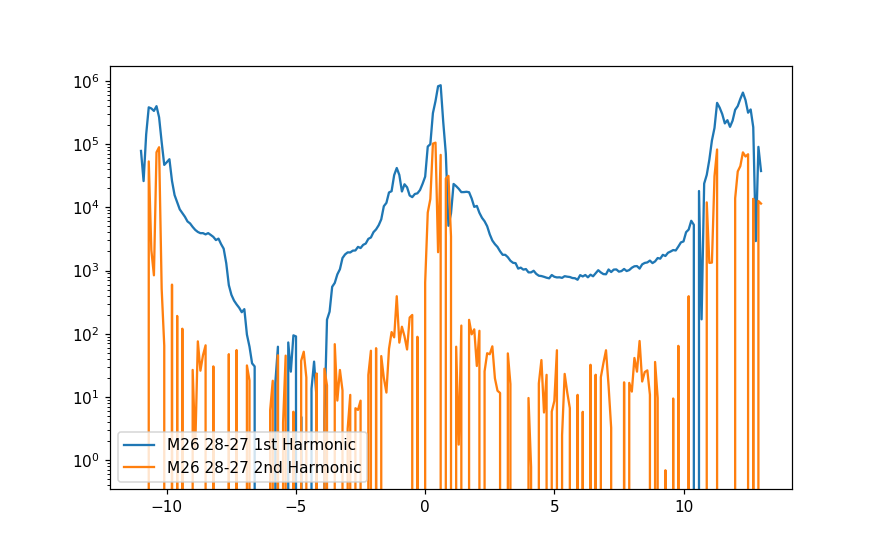

In [361]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, data46.lockin865_X[:]/0.2e-9, label='M26 28-27 1st Harmonic')
plt.semilogy(gvals, data47.lockin865_X[:]/0.2e-9, label='M26 28-27 2nd Harmonic')
plt.legend()

# back to W3

In [365]:
#830 not grounded
srframe.volt_p5(5)
time.sleep(30)
offvals = np.linspace(5000e-3, -5000e-3, 201)
data45, plot45 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='W3_865_48-24_baseT_0.5nA_dvdi_Vg-4p05V_-0.8mT')

Started at 2020-02-10 18:57:26
DataSet:
   location = 'data/2020-02-10/#016_W3_865_48-24_baseT_0.5nA_dvdi_Vg-4p05V_-0.8mT_18-57-25'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-02-10 19:01:30


In [366]:
srframe.volt_p5(-3)
time.sleep(30)
bvals = np.linspace(-0.06, 0, 41)
offvals = np.linspace(-3, 3, 121)
data46, plot46 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, SetDelay1=12, SetDelay2=1.1, Param2_SetBetween=0, DataName='W3_865_48-24_vbg-4p05V_FraunhoferbaseT_0p5nA_course')

Started at 2020-02-10 19:02:18
Please wait 33.682 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.642 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.582 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.642 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.588 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.564 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.576 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.606 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.57 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.546 seconds for the field sweep, plus the time required for oper

In [367]:
# same as last fraunhofer but finer
srframe.volt_p5(-3)
time.sleep(30)
bvals = np.linspace(-0.02, 0.02, 161)
offvals = np.linspace(-3, 3, 121)
data47, plot47 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, SetDelay1=12, SetDelay2=1.2, Param2_SetBetween=0, DataName='W3_865_48-24_vbg-4p05V_FraunhoferbaseT_0p5nA')

Started at 2020-02-10 21:02:28
Please wait 17.986 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.114 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.114 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.096 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.108 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.108 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.102 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.09 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.108 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.102 seconds for the field sweep, plus the time required for oper

In [368]:
srframe.volt_p5(0)
srframe.volt_p1(0)

In [369]:
triton.field(-0.0008)

Sweep time approximately 18.328000000000003 seconds


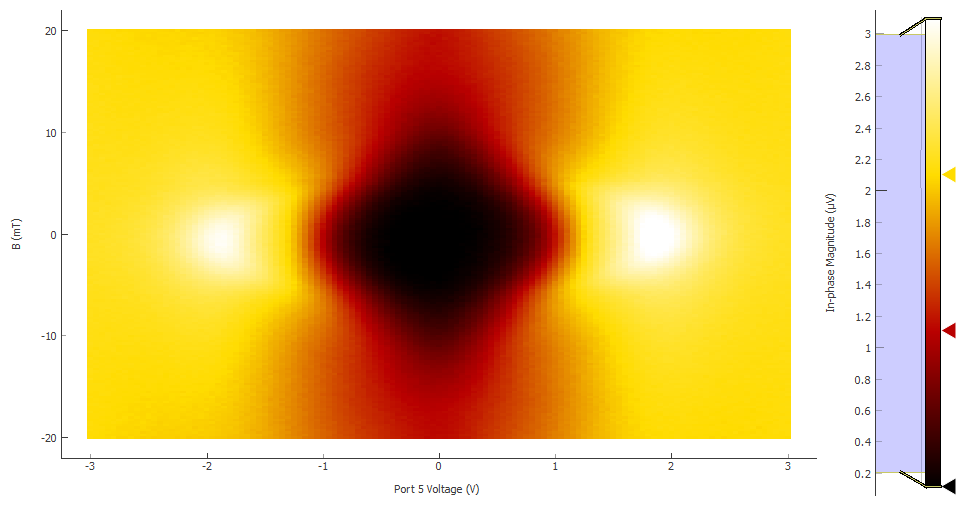

In [370]:
plot47[0]

# W3 fan diagram

All of this is W3, despite the dataset names. (48, 24 are on W3)

In [371]:
srframe.volt_p1(-9)#865 grounded, disconnect 830 ground screw
time.sleep(30)
gvals = np.linspace(-9, 9, 361)
data48, plot48 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W5_865_48-24_830_21-24_baseT_1nA_gatesweep_-0.8mT')
srframe.volt_p1(0)

Started at 2020-02-11 09:25:01
DataSet:
   location = 'data/2020-02-11/#001_W5_865_48-24_830_21-24_baseT_1nA_gatesweep_-0.8mT_09-24-59'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (361,)
   Measured | lockin865_X         | X            | (361,)
   Measured | lockin865_Y         | Y            | (361,)
   Measured | lockin830_X         | X            | (361,)
   Measured | lockin830_Y         | Y            | (361,)
Finished at 2020-02-11 09:32:45


In [376]:
gvals2 = data48.srframe_volt_p1_set[:]

<IPython.core.display.Javascript object>


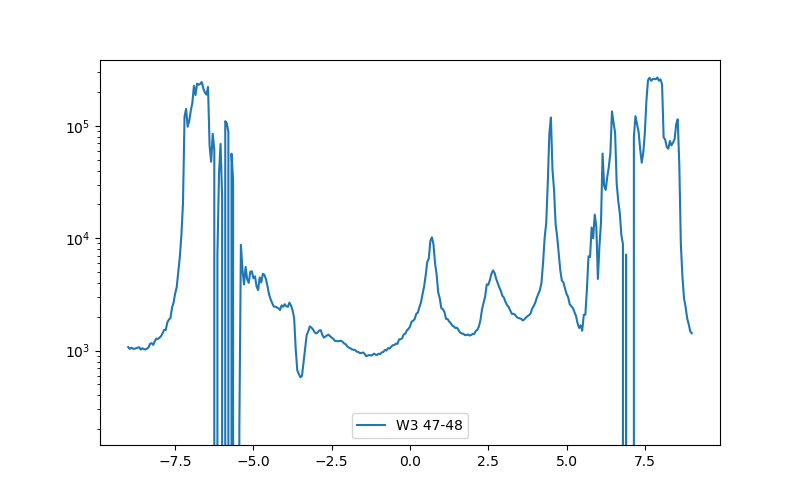

In [377]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals2, data48.lockin865_X[:]/1e-9, label='W3 47-48')
plt.legend()

In [373]:
# still W3

srframe.volt_p1(-9)
time.sleep(15)
gvals = np.linspace(-9, 10, 761)
bvals = np.linspace(0, 8, 161)
data49, plot49 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=15, SetDelay2=1.2, Param2_SetBetween=0, DataName='W5_865_48-24_830_21-24_baseT_1nA_B-Vgsweep')

Started at 2020-02-11 09:37:44
Please wait 10.318 seconds for the field sweep, plus the time required for operating the switch...
Please wait 30.003999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 30.003999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 30.003999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.997999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 30.003999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.997999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 30.003999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.992 seconds for the field sweep, plus the time required for operating the swit

In [374]:
srframe.volt_p1(0)

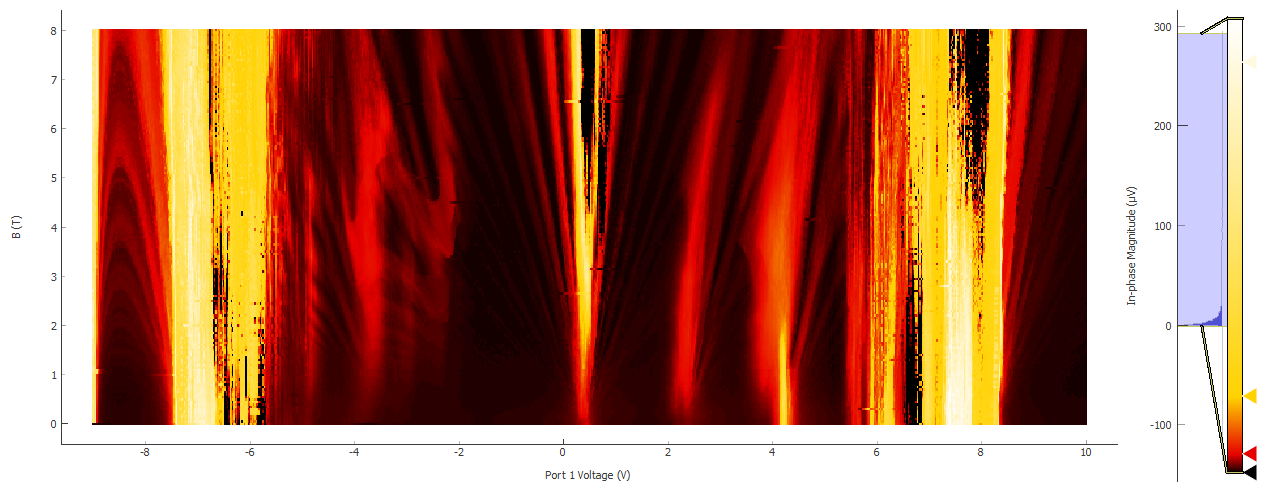

In [378]:
plot49[0]

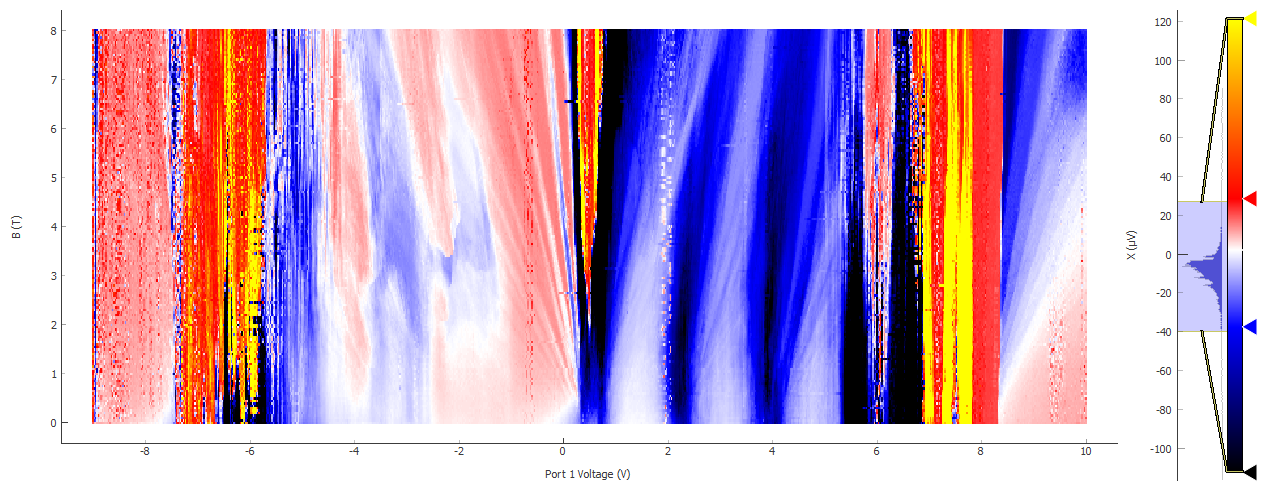

In [379]:
plot49[2]

In [382]:
srframe.volt_p1(-9)
time.sleep(30)
gvals = np.linspace(-9, 9, 361)
data50, plot50 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W3_865_48-47_830_19-47_baseT_1nA_gatesweep_8T')
srframe.volt_p1(0)

Started at 2020-02-13 10:14:32
DataSet:
   location = 'data/2020-02-13/#001_W3_865_48-47_830_19-47_baseT_1nA_gatesweep_8T_10-14-31'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (361,)
   Measured | lockin865_X         | X            | (361,)
   Measured | lockin865_Y         | Y            | (361,)
   Measured | lockin830_X         | X            | (361,)
   Measured | lockin830_Y         | Y            | (361,)
Finished at 2020-02-13 10:22:17


In [383]:
srframe.volt_p1(-9)
time.sleep(30)
gvals = np.linspace(-9, 9, 361)
data51, plot51 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W3_865_48-47_830_20-48_baseT_1nA_gatesweep_8T')
srframe.volt_p1(0)

Started at 2020-02-13 10:45:17
DataSet:
   location = 'data/2020-02-13/#002_W3_865_48-47_830_20-48_baseT_1nA_gatesweep_8T_10-45-15'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (361,)
   Measured | lockin865_X         | X            | (361,)
   Measured | lockin865_Y         | Y            | (361,)
   Measured | lockin830_X         | X            | (361,)
   Measured | lockin830_Y         | Y            | (361,)
Finished at 2020-02-13 10:53:02


# W3 fan diagram 2

In [ ]:
srframe.volt_p1(-9)
time.sleep(30)
gvals = np.linspace(-9, 10, 761)
bvals = np.linspace(8, 0, 161)
data52, plot52 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=30, SetDelay2=1.2, Param2_SetBetween=0, DataName='W5_865_47-48_830_20-48_baseT_1nA_B-Vgsweep')

Started at 2020-02-13 11:01:47
Please wait 10.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 30.003999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.997999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 30.01 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.997999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.997999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 30.003999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 30.01 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.997999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please w

In [7]:
# the computer restarted itself

In [10]:
triton.field()

1.649998

In [11]:
srframe.volt_p1(-9)
time.sleep(30)
gvals = np.linspace(-9, 10, 761)
bvals = np.linspace(1.7, 0, 35)
data53, plot53 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=30, SetDelay2=1.2, Param2_SetBetween=0, DataName='W5_865_47-48_830_20-48_baseT_1nA_B-Vgsweep')

Started at 2020-02-15 10:40:26
Are you sure you want to use the magnet? [y/n]: y
Please wait 30.003999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.997999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 30.003999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 30.003999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 30.003999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 30.003999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.997999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.997999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 30.01 seconds for t

In [12]:
srframe.volt_p1(0)

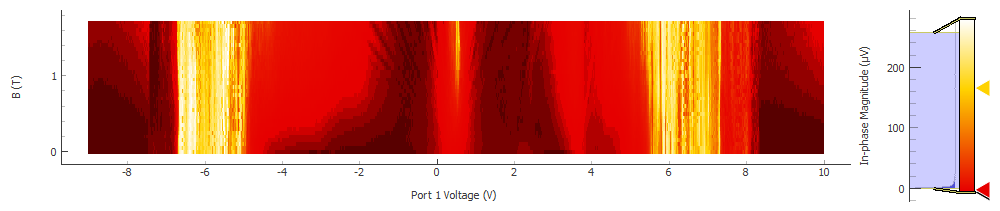

In [14]:
plot53[0]

# M26 fan diagram

In [15]:
srframe.volt_p1(-15)
time.sleep(10)
gvals = np.linspace(-15, 15, 301)
data54, plot54 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M26_basetemp_1nA_29-28_865_28-27_830')
srframe.volt_p1(0)

Started at 2020-02-15 21:52:10
DataSet:
   location = 'data/2020-02-15/#002_M26_basetemp_1nA_29-28_865_28-27_830_21-52-08'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
   Measured | lockin830_X         | X            | (301,)
   Measured | lockin830_Y         | Y            | (301,)
Finished at 2020-02-15 21:59:23


<IPython.core.display.Javascript object>


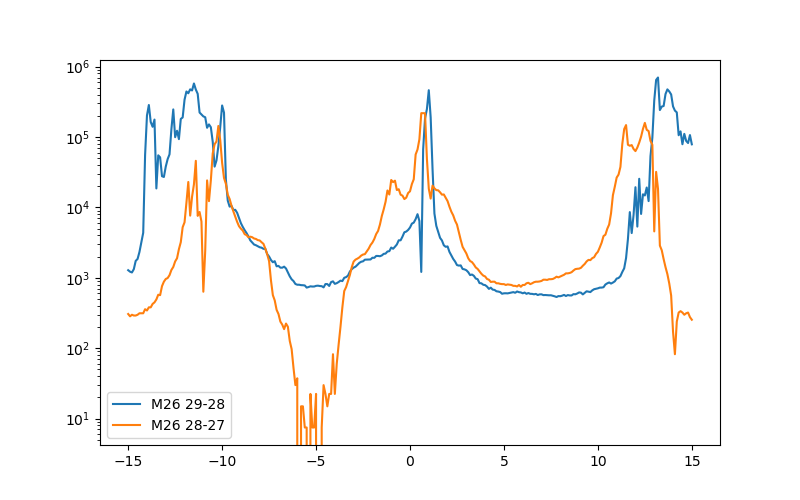

In [19]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data54.lockin865_X[:]/1e-9), label='M26 29-28')
plt.semilogy(gvals, np.abs(data54.lockin830_X[:]/1e-9), label='M26 28-27')
plt.legend()

In [21]:
srframe.volt_p1(-16)#2nA
time.sleep(15)
gvals = np.linspace(-16, 17, 661)
bvals = np.linspace(0, 8, 161)
data55, plot55 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=30, SetDelay2=1.2, Param2_SetBetween=0, DataName='M26_basetemp_1nA_29-28_865_28-27_830_baseT_2nA_B-Vgsweep')

Started at 2020-02-15 22:07:13
Please wait 10.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.992 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.997999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.992 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.997999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.997999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.997999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.992 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.997999999999998 seconds for the field sweep, plus the time required for operating the switch...
Please wait 29.997

In [22]:
srframe.volt_p1(0)

In [23]:
srframe.volt_p1(-15)
time.sleep(10)
gvals = np.linspace(-15, 15, 301)
data56, plot56 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M26_basetemp_2nA_28-2_865_27-25_830_8T')
srframe.volt_p1(0)

Started at 2020-02-18 10:20:21
DataSet:
   location = 'data/2020-02-18/#001_M26_basetemp_2nA_28-2_865_27-25_830_8T_10-20-20'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
   Measured | lockin830_X         | X            | (301,)
   Measured | lockin830_Y         | Y            | (301,)
Finished at 2020-02-18 10:27:35


In [24]:
srframe.volt_p1(-16)
time.sleep(15)
gvals = np.linspace(-16, 17, 661)
bvals = np.linspace(8, 0, 161)
data57, plot57 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=30, SetDelay2=1.2, Param2_SetBetween=0, DataName='M26_basetemp_2nA_28-2_865_27-25_830_baseT_2nA_B-Vgsweep')

Started at 2020-02-18 10:30:16
Please wait 10.024 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating

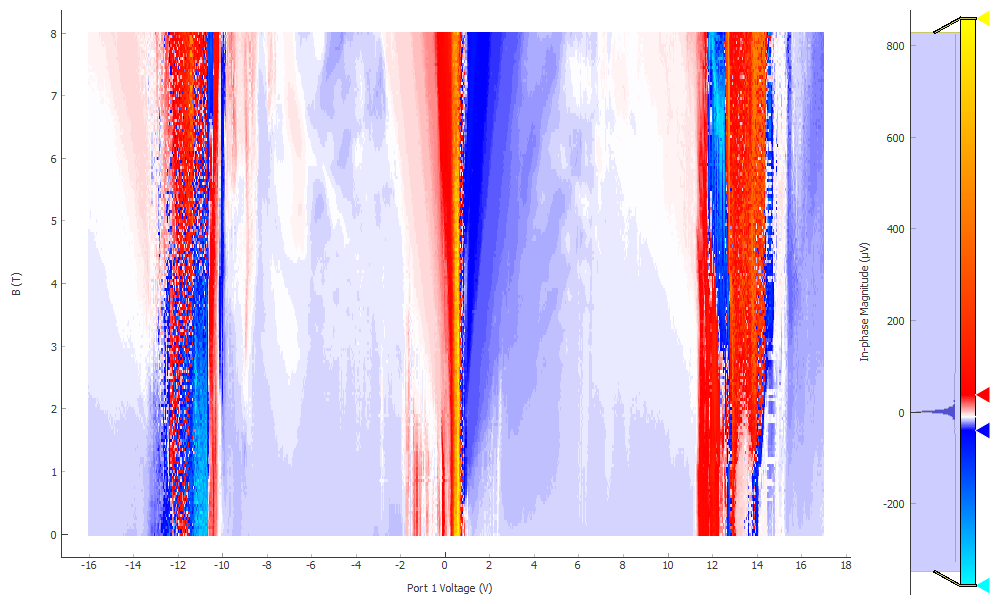

In [25]:
plot57[0]

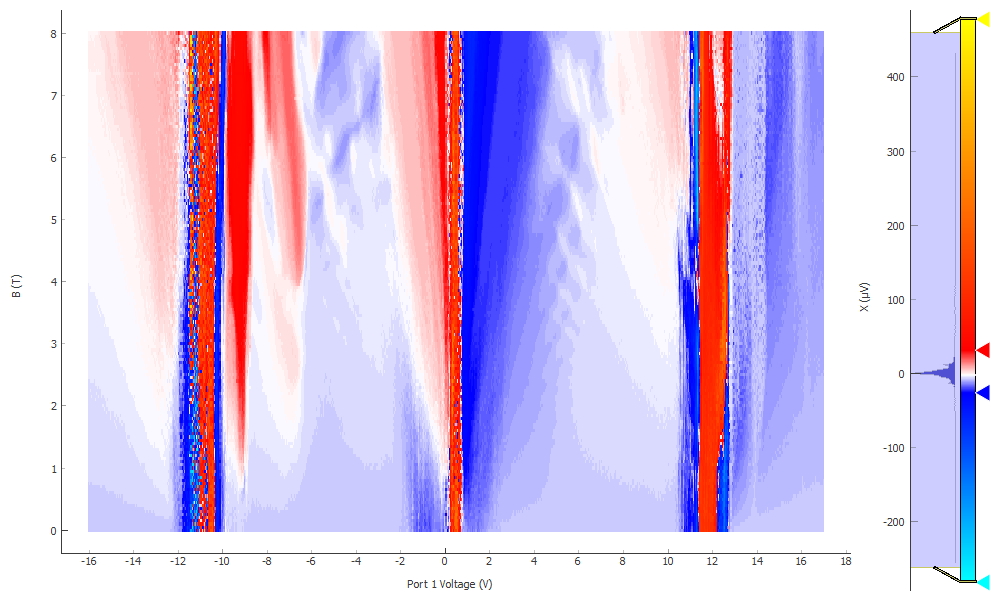

In [26]:
plot57[2]

In [27]:
data57.triton_field_set_stable_set

DataArray[161]: triton_field_set_stable_set
array([8.  , 7.95, 7.9 , 7.85, 7.8 , 7.75, 7.7 , 7.65, 7.6 , 7.55, 7.5 ,
       7.45, 7.4 , 7.35, 7.3 , 7.25, 7.2 , 7.15, 7.1 , 7.05, 7.  , 6.95,
       6.9 , 6.85, 6.8 , 6.75, 6.7 , 6.65, 6.6 , 6.55, 6.5 , 6.45, 6.4 ,
       6.35, 6.3 , 6.25, 6.2 , 6.15, 6.1 , 6.05, 6.  , 5.95, 5.9 , 5.85,
       5.8 , 5.75, 5.7 , 5.65, 5.6 , 5.55, 5.5 , 5.45, 5.4 , 5.35, 5.3 ,
       5.25, 5.2 , 5.15, 5.1 , 5.05, 5.  , 4.95, 4.9 , 4.85, 4.8 , 4.75,
       4.7 , 4.65, 4.6 , 4.55, 4.5 , 4.45, 4.4 , 4.35, 4.3 , 4.25, 4.2 ,
       4.15, 4.1 , 4.05, 4.  , 3.95, 3.9 , 3.85, 3.8 , 3.75, 3.7 , 3.65,
       3.6 , 3.55, 3.5 , 3.45, 3.4 , 3.35, 3.3 , 3.25, 3.2 , 3.15, 3.1 ,
       3.05, 3.  , 2.95, 2.9 , 2.85, 2.8 , 2.75, 2.7 , 2.65, 2.6 , 2.55,
       2.5 , 2.45, 2.4 , 2.35, 2.3 , 2.25, 2.2 , 2.15, 2.1 , 2.05, 2.  ,
       1.95, 1.9 , 1.85, 1.8 , 1.75, 1.7 , 1.65, 1.6 , 1.55, 1.5 , 1.45,
       1.4 , 1.35, 1.3 , 1.25, 1.2 , 1.15, 1.1 , 1.05, 1.  , 0.95, 0.9 ,
       

In [34]:
# get a couple of negative field points for low-field Hall measurements
srframe.volt_p1(-16)
time.sleep(15)
gvals = np.linspace(-16, 17, 661)
bvals = [-0.1, -0.2]
data58, plot58 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=30, SetDelay2=1.2, Param2_SetBetween=0, DataName='M26_basetemp_2nA_28-2_865_27-25_830_baseT_2nA_negB-Vgsweep')

Started at 2020-02-20 17:39:06
Please wait 69.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.0 seconds for the field sweep, plus the time required for operating the switch...
DataSet:
   location = 'data/2020-02-20/#001_M26_basetemp_2nA_28-2_865_27-25_830_baseT_2nA_negB-Vgsweep_17-39-03'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (2,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (2, 661)
   Measured | lockin865_X                 | X                | (2, 661)
   Measured | lockin865_Y                 | Y                | (2, 661)
   Measured | lockin830_X                 | X                | (2, 661)
   Measured | lockin830_Y                 | Y                | (2, 661)
Finished at 2020-02-20 18:11:14


In [35]:
triton.field_set_stable(0)

Please wait 129.994 seconds for the field sweep, plus the time required for operating the switch...


In [40]:
srframe.volt_p5(0)

In [41]:

bvals = np.linspace(-0.2, 0.2, 161)
offvals = np.linspace(-6, 6, 241)
data59, plot59 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin830.X, lockin830.Y, lockin865.X, lockin865.Y, SetDelay1=12, SetDelay2=1.1, Param2_SetBetween=0, DataName='M26_865_28-27_vbg-5p2V_FraunhoferbaseT_0p5nA')

Started at 2020-02-21 10:14:38
Please wait 130.01800000000003 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.494 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.494 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.5 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.494 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.488 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.512 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.494 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.5 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.494 seconds for the field sweep, plus the time required

In [42]:
bvals = np.linspace(0.2, -0.2, 161)
offvals = np.linspace(-5, 5, 201)
data60, plot60 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin830.X, lockin830.Y, lockin865.X, lockin865.Y, SetDelay1=12, SetDelay2=1.1, Param2_SetBetween=0, DataName='M26_865_28-27_vbg-5p4V_FraunhoferbaseT_0p5nA')

Started at 2020-02-23 14:08:34
Please wait 10.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.5 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.506 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.5 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.5 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.5 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.5 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.506 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.506 seconds for the field sweep, plus the time required for operating the switch...
Please wait 11.5 seconds for the field sweep, plus the time required for operating the swi

In [43]:
bvals = np.linspace(-0.05, 0.05, 101)
offvals = np.linspace(-5, 5, 201)
data61, plot61 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin830.X, lockin830.Y, lockin865.X, lockin865.Y, SetDelay1=12, SetDelay2=1.1, Param2_SetBetween=0, DataName='M26_865_28-27_vbg-5p4V_FraunhoferbaseT_0p5nA_finer')

Started at 2020-02-24 02:52:56
Please wait 100.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.606 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.588 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.576 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.612 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.6 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.606 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.612 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.606 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.582 seconds for the field sweep, plus the time required for operat

# W5 Temperature dependence

In [44]:
srframe.volt_p1(6)
time.sleep(10)
gvals = np.linspace(6, -6, 241)
data62, plot62 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='W5_basetemp_1nA_lockin865_40-39_lockin830_39-38')
srframe.volt_p1(0)

Started at 2020-02-24 11:55:54
DataSet:
   location = 'data/2020-02-24/#002_W5_basetemp_1nA_lockin865_40-39_lockin830_39-38_11-55-53'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (241,)
   Measured | lockin865_X         | X            | (241,)
   Measured | lockin865_Y         | Y            | (241,)
Finished at 2020-02-24 12:00:47


In [45]:
srframe.volt_p1(-6)
time.sleep(10)
gval = np.linspace(-6, 6.5, 626)
data63, plot63 = npd.single_param_sweep(srframe.volt_p1, gval, 1.3, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W5_basetemp_0p5nA_865_40-39_830_39-38', YParam=[lockin865.X, lockin830.X])
srframe.volt_p1(0)

Started at 2020-02-24 12:14:52
DataSet:
   location = 'data/2020-02-24/#003_W5_basetemp_0p5nA_865_40-39_830_39-38_12-14-51'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (626,)
   Measured | lockin865_X         | X            | (626,)
   Measured | lockin865_Y         | Y            | (626,)
   Measured | lockin830_X         | X            | (626,)
   Measured | lockin830_Y         | Y            | (626,)
Finished at 2020-02-24 12:29:59


In [46]:
srframe.volt_p1(-6)
time.sleep(10)
gval = np.linspace(-6, 6.5, 626)
data64, plot64 = npd.single_param_sweep(srframe.volt_p1, gval, 1.3, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W5_basetemp_0p5nA_865_40-39_830_39-38', YParam=[lockin865.X, lockin830.X])
srframe.volt_p1(0)

Started at 2020-02-24 12:31:18
DataSet:
   location = 'data/2020-02-24/#004_W5_basetemp_0p5nA_865_40-39_830_39-38_12-31-17'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (626,)
   Measured | lockin865_X         | X            | (626,)
   Measured | lockin865_Y         | Y            | (626,)
   Measured | lockin830_X         | X            | (626,)
   Measured | lockin830_Y         | Y            | (626,)
Finished at 2020-02-24 12:46:31


In [47]:
triton.pid_setpoint(0.03)

In [48]:
triton.pid_mode(1)

In [49]:
triton.pid_range(1)

In [50]:
triton.pid_setpoint(0.05)

In [51]:
triton.pid_range(10)

In [52]:
srframe.volt_p1(-6)
time.sleep(10)
Tvals = np.linspace(0.05, 1, 20)
gvals = np.linspace(-6, 6.5, 626)
data65, plot65 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=1.3, Param2_SetBetween=0, DataName='W5_basetemp_0p5nA_865_40-39_830_39-38_gateTsweepto1K_0p5nA')
srframe.volt_p1(0)

Started at 2020-02-24 16:49:38
DataSet:
   location = 'data/2020-02-24/#005_W5_basetemp_0p5nA_865_40-39_830_39-38_gateTsweepto1K_0p5nA_16-49-36'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (20,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (20, 626)
   Measured | lockin865_X             | X            | (20, 626)
   Measured | lockin865_Y             | Y            | (20, 626)
   Measured | lockin830_X             | X            | (20, 626)
   Measured | lockin830_Y             | Y            | (20, 626)
Finished at 2020-02-24 22:50:58


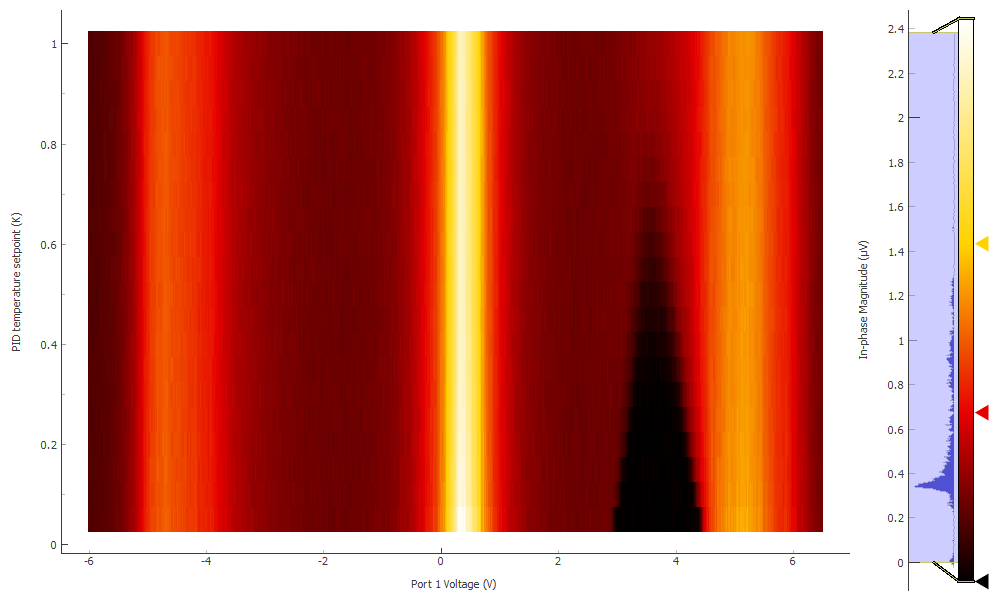

In [53]:
plot65[0]

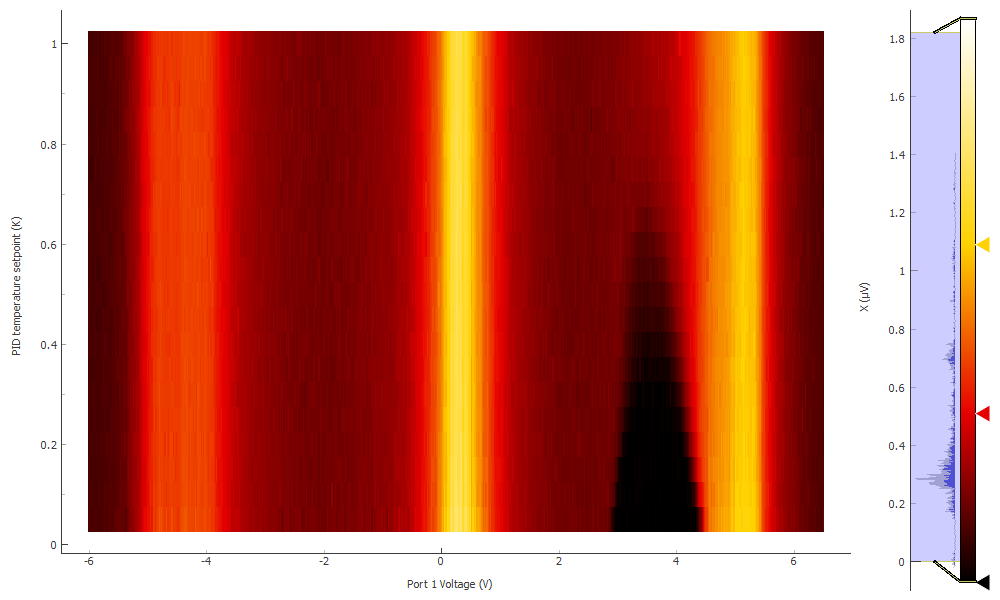

In [54]:
plot65[2]

In [55]:
triton.pid_range(31.6)
time.sleep(3)

In [72]:
triton.pid_setpoint(1.1)

In [73]:
srframe.volt_p1(-6)
time.sleep(10)
Tvals = np.linspace(1.1, 1.4, 4)
gvals = np.linspace(-6, 6.5, 626)
data66, plot66 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=1.3, Param2_SetBetween=0, DataName='W5_basetemp_865_40-39_830_39-38_gateTsweep1p1to1p4K_0p5nA', ZParam=[lockin865.X, lockin830.X])
srframe.volt_p1(0)

Started at 2020-02-24 22:57:44
DataSet:
   location = 'data/2020-02-24/#006_W5_basetemp_865_40-39_830_39-38_gateTsweep1p1to1p4K_0p5nA_22-57-43'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (4,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (4, 626)
   Measured | lockin865_X             | X            | (4, 626)
   Measured | lockin865_Y             | Y            | (4, 626)
   Measured | lockin830_X             | X            | (4, 626)
   Measured | lockin830_Y             | Y            | (4, 626)
Finished at 2020-02-25 00:09:58


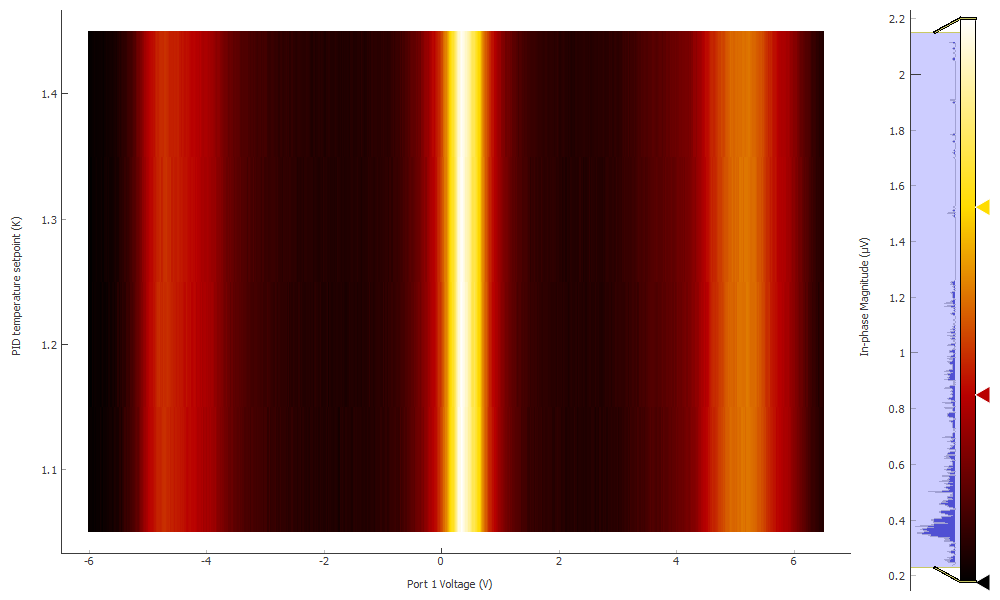

In [78]:
plot66[0]

In [74]:
triton.pid_range(100)
time.sleep(3)

In [80]:
triton.pid_setpoint(1.5)

In [81]:
srframe.volt_p1(-6)
time.sleep(10)
Tvals = np.linspace(1.5, 2, 6)
gvals = np.linspace(-6, 6.5, 626)
data67, plot67 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=1.3, Param2_SetBetween=0, DataName='W5_basetemp_865_40-39_830_39-38_gateTsweep1p5to2K_0p5nA', ZParam=[lockin865.X, lockin830.X])
srframe.volt_p1(0)

Started at 2020-02-25 00:19:26
DataSet:
   location = 'data/2020-02-25/#001_W5_basetemp_865_40-39_830_39-38_gateTsweep1p5to2K_0p5nA_00-19-25'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (6,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (6, 626)
   Measured | lockin865_X             | X            | (6, 626)
   Measured | lockin865_Y             | Y            | (6, 626)
   Measured | lockin830_X             | X            | (6, 626)
   Measured | lockin830_Y             | Y            | (6, 626)
Finished at 2020-02-25 02:07:57


In [82]:
srframe.volt_p1(0)

In [85]:
triton.pid_mode(0)  # then switch to the cernox sensor by changing 8 to 5 in the pid window, turning off 8 and on 5.

In [84]:
triton.pid_mode(1)

In [86]:
triton.pid_setpoint(2)
triton.pid_range(100)

In [87]:
triton.pid_setpoint(2.1)

In [ ]:
srframe.volt_p1(-6)
time.sleep(10)
Tvals = np.linspace(2.1, 10, 80)
gvals = np.linspace(-6, 6.5, 626)
data68, plot68 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=1.3, Param2_SetBetween=0, DataName='W5_basetemp_865_40-39_830_39-38_gateTsweep2.1Kto10K_0p5nA', ZParam=[lockin865.X, lockin830.X])
srframe.volt_p1(0)

Started at 2020-02-25 09:49:24
